# WRI363: Madhav Ajayamohan's Data Story– An Exploration of Data on Expatriate Keralite's in Abu Dhabi Before and During the COVID-19 Pandemic

Allow me to introduce myself– my name is Madhav Ajayamohan. In my class WRI363: Communicating in a World of Data, we learn how to represent data in an accessible way. I will be analyzing the unique dataset of Expatriate Keralies from Abu Dhabi. Allow me to give you some context.

## The Background Information

The United Arab Emirates (UAE) is home to a large portion of Keralite (people from the southern state of Kerala) expatriates. As of 2008, 41.9% of all Keralite emigrants reside in the UAE (Prakash). They have developed a unique community in the country by creating “a subculture of their own” (Rajeev). This community is an integral part of the Kerala economy.

In the last half century, “the factor which has had the greatest impact upon [Kerala’s] economy especially on labour market, consumption, savings, investment, poverty, income distribution, and economic change… has been the migration to the Gulf and migrant remittances” (Prakash). In 2008, the total amount of remittances that flowed into Kerala was equal to 10.4 billion USD, and it made up 30.7% of Kerala’s GDP (Rajan and Zachariah). These remittances have played a large role in Kerala’s high Human Development Index. The large influx of income promotes higher levels of education and health, besides reducing poverty (Rajan and Zachariah).

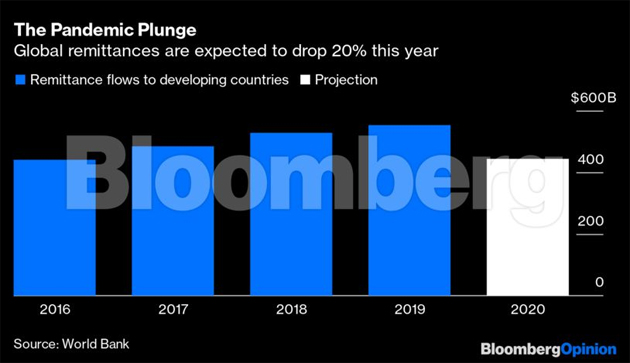


**Fig.1 Graph on remittances to India (Ghosh)**

However, the Covid-19 pandemic significantly decreased the volume of remittances that flowed into India during the pandemic. India is estimated to suffer a 22% decline in remittances (Fig.1), as a result of decreased wages and job loss. A study indicates that out of the 869,630 expatriates who returned to Kerala, 65.2% cited job loss as the reason to return (“COVID-19 Impact”). Most expatriates have suffered “pay cuts, unpaid leave and [job] uncertainty” (Cherian and Kumar).

So, the question I want to investigate is

**Did the pandemic decrease Keralite's propensity to save? Or did they maintain their propensity to save, despite the lower economic situations?**


## A Counter Data Approach

This entire data piece should be viewed as counter data. Counter data is data that  resists typical practices for collecting, managing, analyzing, and using data. In most cases, stastics and visualizations shown to the general public does not include reasoning as to how those stastics and visualizations were produced. However, in this Jupyter Notebook, I explain to the reader how I cleaned the data, why I made the decisions I did, and how I get to each step of the process. The very reason I chose a Jupyter Notebook is to give reader's an intimate look into what assumptions I make during data collection, cleaning, and analysis.

## The Cleaning Process

### Initial Data Representation

Let us first take a look at the dataset we will working with:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from scipy.stats import linregress

The code above imports important coding libraries used for data analysis. Libraries contain methods that are already programmed for you– so I don't need to hardcode every single method from scratch. I'll explain each library as they come up.

In [2]:
all_df = pd.read_csv("/content/The Google Form Data - Form Responses 1.csv")

Here we use the Pandas Library to get the dataset we will be using. This data is stored in what we call a dataframe. A dataframe is something that makes it easier to work with data– it looks like a table. Here's is some infromation on our data set, and the first few lines of our dataset:

In [3]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 29 columns):
 #   Column                                                                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                         --------------  ----- 
 0   Timestamp                                                                                                                                                                                                      204 non-null    object
 1   What is your profession?                                                                                                                                                                 

In [4]:
all_df.head()

,Timestamp,What is your profession?,Please indicate your gender,BEFORE the Covid-19 pandemic (before March 1st 2020)?,"DURING the Covid-19 pandemic (during March 1st to August 31st, 2020)?",BEFORE the Covid-19 pandemic (before March 1st 2020)?.1,"DURING the Covid-19 pandemic (during March 1st to August 31st, 2020)?.1",How many people in Kerala do you financially support with your income?,How important is it for you to send money back to Kerala?,I send money to Kerala:,...,Fruits and Vegetables,"PREPARED MEALS (Prepared Meals are items like Cup noodles, Heat & eat items like packaged curries, Maggi, Frozen chapati/paratha, Khubhus, Readymade idli/ appam batter, Restaurant take away/dine in, etc)","SWEETS AND SNACKS (Sweets and Snacks are items like Bakery items, Ice-cream, Chocolates, etc)","PERSONAL CARE AND EFFECTS (Personal Care and Effects are items like Clothing, Footwear, Ornaments, Soap, Visiting Barber/beautician, etc)","HOUSING RELATED EXPENDITURES (Housing Related expenditures are expenses like Housing Rent, Electricity Bill, Water Bill, etc)","HEALTHCARE (Healthcare includes expenses like Medicine fees, Doctor’s fees, Purchasing of medical equipment, Homeo medicines, etc)","TRANSPORTATION EXPENSES (Transportation expenses include expenses like Bus fare, Taxi fare, Petrol/Diesel costs, airplane fare, etc)","COMMUNICATION EXPENSES (Communication Expenses include expenses like Phone bills, Postage expenses, Internet expenses, etc)","RECREATION AND AMUSEMENT (Recreation and Amusement includes expenses like Cable connection fees, Newspapers, Playing Cards, carrom boards, etc)","HOUSEHOLD GOODS AND SERVICES (Household Goods and Services include items like Furniture, Bedding, Appliances like TV, Fridge, Washing machine, Stove, et cetera)"
0,7/22/2021 17:11:36,Administrative Clerk,Female,"5,001-10,000 AED","5,001-10,000 AED","Housing, Transportation (Bus pass, fuel, etc)","Housing, Transportation (Bus pass, fuel, etc)",0,Unimportant (Family can support basic necessit...,"To save/invest money (to build a home, deposit...",...,Highly increased (by more than 50 AED),Highly increased (by more than 50 AED),Highly increased (by more than 50 AED),Highly increased (by more than 50 AED),No change,No change,Highly decreased (by more than 50 AED),Highly increased (by more than 50 AED),Highly increased (by more than 50 AED),No change
1,7/22/2021 17:46:12,Administrative assistant,Male,"10,001-15,000 AED","10,001-15,000 AED","Housing, Healthcare, Transportation (Buss pass...","Housing, Healthcare, Transportation (Buss pass...",4,Important (Family has some income but depends ...,Both,...,Slightly Increased (by 1 -50 AED),Slightly Increased (by 1 -50 AED),Slightly Increased (by 1 -50 AED),Slightly Increased (by 1 -50 AED),No change,Highly increased (by more than 100 AED),Highly increased (by more than 50 AED),Highly increased (by more than 50 AED),No change,No change
2,7/22/2021 19:52:30,Accountant,Female,"15,001-20,000 AED","15,001-20,000 AED",NaN,NaN,4,Unimportant (Family can support basic necessit...,Both,...,Highly increased (by more than 50 AED),Slightly Increased (by 1 -50 AED),Highly decreased (by more than 50 AED),Highly decreased (by more than 50 AED),Slightly Increased (by 1 -500 AED),No change,Highly decreased (by more than 50 AED),Highly increased (by more than 50 AED),No change,Highly decreased (by more than 500 AED)
3,7/22/2021 19:59:17,Accountant,Female,"15,001-20,000 AED","15,001-20,000 AED",NaN,NaN,4,Unimportant (Family can support basic necessit...,Both,...,Highly increased (by more than 50 AED),Slightly Increased (by 1 -50 AED),Highly decreased (by more than 50 AED),Highly decreased (by more than 50 AED),Slightly Increased (by 1 -500 AED),No change,Highly decreased (by more than 50 AED),Highly increased (by more than 50 AED),No change,Highly decreased (by more than 500 AED)
4,7/22/2021 20:00:46,Marketing executive,Male,"10,001-15,000 AED",NaN,"Healthcare, Transportation (Buss pass, fuel, etc)","Healthcare, Transportation 

Now, lets start talking about the dataset in question. I actually personally collected the data above by myself.

In 2020, I did a survey of expatriate Keralites in Abu Dhabi. I sent out an online questionnaire of data with Google Forms with multiple questions.

I collected the data using Snowball Sampling– so I send the survey to some people, and those people send it to other people, and so on and so forth. I chose this survey method... because no other survey method would make sense for me. I was a high schooler– I had no way to actually reach out to people with more respected methods of data collection such as a random sample (choosing random keralite expatriates from a set of all expatriates).

But, this method of data collection is a form of counter data. I am giving the Keralite expatriate population more control over the data on themselves– so this might actually be better.

The paper-copies of the survey's I sent out is attached as an Appendices in my GitHub– so feel free to check it out. In this data analysis I will not work with every piece of information. I will only focus on a few, important points of data:



1.   Income Level Before/During the Pandemic

2.   The Number of People They Support in Kerala with their Income

3.   Importance of Sending Money back to Kerala for their Family

4.   Remmitance Habits based on the Exhange Rate between INR and AED

6.   Percentage of Income Saved Before/During the Pandmic

7.   Percentage of Money Sent to Kerala Before/During the Pandemic


*As a side note, please note that Before the Pandemic is viewed as the time period before March 1st, 2020. During the Panemic is viewed as the time period in-between March 1st to August 31st, 2020.*


In [5]:
main_df = pd.DataFrame() # The main dataframe I will use for this investigation
main_df["Income Before Pandemic"] = all_df.iloc[:, 3]
# Data on Income Level Before Pandemic

main_df["Income During Pandemic"] = all_df.iloc[:, 4]
# Data on Income Level During the Pandemic

main_df["People Supporting in Kerala"] = all_df.iloc[:, 7]
# Data on People Supported in Kerala by the Expatriate

main_df["Importance"] = all_df.iloc[:, 8]
# Data on how Important it is to send money back to family members

main_df["Exchange Rate"] = all_df.iloc[:, 10]
# Data on Behavior based on Exchange Rate

main_df["Percentage Saved Before"] = all_df.iloc[:, 12]
# Percentage of Income Saved Before the Pandemic

main_df["Percentage Saved During"] = all_df.iloc[:, 13]
# Percentage of Income Saved dURING the Pandemic

main_df["Percentage Sent to Kerala Before"] = all_df.iloc[:, 14]
# Percentage of Money Sent to Kerala Before the Pandemic

main_df["Percentage Sent to Kerala During"] = all_df.iloc[:, 15]
# Percentage of Money Sent to Kerala Before the Pandemic

main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            202 non-null    object
 1   Income During Pandemic            200 non-null    object
 2   People Supporting in Kerala       196 non-null    object
 3   Importance                        204 non-null    object
 4   Exchange Rate                     204 non-null    object
 5   Percentage Saved Before           204 non-null    object
 6   Percentage Saved During           204 non-null    object
 7   Percentage Sent to Kerala Before  204 non-null    object
 8   Percentage Sent to Kerala During  204 non-null    object
dtypes: object(9)
memory usage: 15.0+ KB


In [6]:
main_df.head()

,Income Before Pandemic,Income During Pandemic,People Supporting in Kerala,Importance,Exchange Rate,Percentage Saved Before,Percentage Saved During,Percentage Sent to Kerala Before,Percentage Sent to Kerala During
0,"5,001-10,000 AED","5,001-10,000 AED",0,Unimportant (Family can support basic necessit...,I send more money to my family in Kerala,80,80,80,80
1,"10,001-15,000 AED","10,001-15,000 AED",4,Important (Family has some income but depends ...,I send more money to my family in Kerala,50,50,50,50
2,"15,001-20,000 AED","15,001-20,000 AED",4,Unimportant (Family can support basic necessit...,I send more money to my family in Kerala,10 percent,20-30%,20%,30-40%
3,"15,001-20,000 AED","15,001-20,000 AED",4,Unimportant (Family can support basic necessit...,I send more money to my family in Kerala,10 percent,20-30%,20%,30-40%
4,"10,001-15,000 AED",NaN,2,Unimportant (Family can support basic necessit...,I send more money to my family in Kerala,25,25,10,5


The main_df is the data frame that contains most of the data that we are working with. Now, we need to clean the data in each column. So, let's go through it.

### Income Before/During the Pandemic

In my survey, we collected information on respondent income by asking them if they were in one of the following monthly income levels:

1. 0 - 2,500 AED
2. 2,500 - 5,000 AED
3. 5,001- 10,000 AED
4. 10,001 - 15,000 AED
5. 15,001 - 20,000 AED
6. 20,001- 25,000 AED
7. 25,001- 30,000 AED
8. 30,001- 35,000 AED
9. 35,001- 40,000 AED
10. Greater than 40,000 AED

Infromation on income gained this way is weaker– specific information on income would be much better. However, this was to secure the privacy of the respondents– even though the survey was anonymous, people would still hesitate to share information on income. So, I chose income ranges.

You may also notice that every income range is not equal in size. The first two are intervals of 2500 and the rest are in intervals of 5000.

I made this descion because there is more variability in the the lower income ranges. Many Keralite expatrates are blue collar workers with low salaries– these low ranges are necessary to capture their change in come from before to during the pandemic.

However, the more income you have, the less variability– so we used larger ranges.

I will replace each income range with the median income in that range so I get all integer values– the median income is used an approximate for each respondents income.

For "Greater than 40,000 AED" I will replace it with 45,000. This may be inaccurate, but in the survey only 3 people chose this category– and two of them left this category during the pandemic. So, this should be fine.

You may be curious as to why I want to make everything an integer– or a number. In this data analyssi project, I want to do quantitative data analysis. In order to do that, I need numbers for every field. That's why we are focusing on cleaning the data like this.

In [7]:
main_df.dropna(inplace=True)
# This removes all records (rows) with any null value somewhere
# I am choosing to do this to not deal with any weird records without full information

replace_dict = {'0-2,500 AED':1250, '2,500-5,000 AED':3750, '5,001-10,000 AED':7500,
                '10,001-15,000 AED':12500, '15,001-20,000 AED':17500, '20,001-25,000 AED': 22500,
                '25,001-30,000 AED':27500, '30,001-35,000 AED':32500, '35,001-40,000 AED': 37500,
                'Greater than 40,000 AED': 45000}

main_df.replace({'Income Before Pandemic': replace_dict, 'Income During Pandemic': replace_dict}, inplace=True)
main_df['Income Before Pandemic'].replace('15,001-20,000 AED\t\t', 17500, inplace=True)
main_df['Income During Pandemic'].replace('5,001-10,000 AED\t\t', 17500, inplace=True)

main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            192 non-null    int64 
 1   Income During Pandemic            192 non-null    int64 
 2   People Supporting in Kerala       192 non-null    object
 3   Importance                        192 non-null    object
 4   Exchange Rate                     192 non-null    object
 5   Percentage Saved Before           192 non-null    object
 6   Percentage Saved During           192 non-null    object
 7   Percentage Sent to Kerala Before  192 non-null    object
 8   Percentage Sent to Kerala During  192 non-null    object
dtypes: int64(2), object(7)
memory usage: 15.0+ KB


<ipython-input-7-7abb98f98a5c>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['Income Before Pandemic'].replace('15,001-20,000 AED\t\t', 17500, inplace=True)
<ipython-input-7-7abb98f98a5c>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_df['Income Before Pandemic'].replace('15,001-

Thus, we have now replaced every value in the "Income Before Pandemic" and "Income During Pandemic" with integers, as needed. We can tell with the int64 Dtype– which just tells us the column has the type int, as needed.

### People Supported in Kerala

This is a relatively simple column to clean. The data can naturally be presented as integers– the only issue is that there are some non-number answers in the responses. So, we need to fix them.

In [8]:
main_df["People Supporting in Kerala"].value_counts()

,count
People Supporting in Kerala,
4,36
5,31
2,23
3,16
0,12
1,10
10,6
6,6
7,6


The above is table of all the responses, and how many times they appear. In these responses, some of the non-number responses are acceptable– like "Two" or "Ten". But some responses can't be used– like "Only my Family" of "Some Communities". So we will delete the values we can't use, and replace the others with the appropriate number.

In [9]:
removal_str = "Only my family|As much as i can|Lessthan  5000 only.|Some communities|More than10|2 family|My family|More than 13|Family|Below 6|0 in Kerala but 3 in Abu Dhabi"

main_df["People Supporting in Kerala"].replace(['My family (4 people)', 'Four', '4'], 4, inplace=True)

main_df = main_df[~main_df['People Supporting in Kerala'].str.contains(removal_str, case=False, na=False)]

main_df["People Supporting in Kerala"].replace(['O', 'No', 'Nil', 'Nothing', 'None', 'None ',  'Nobody', 'Nobody ', '0'], 0, inplace=True)

main_df["People Supporting in Kerala"].replace(['Two', 'Two ', '2'], 2, inplace=True)

main_df["People Supporting in Kerala"].replace(['One', '1'], 1, inplace=True)

main_df["People Supporting in Kerala"].replace(['Ten', 'Around 10', '10'], 10, inplace=True)

main_df["People Supporting in Kerala"].replace(['5 people ', '5'], 5, inplace=True)

main_df["People Supporting in Kerala"].replace(['Three.', '3'], 3, inplace=True)

main_df["People Supporting in Kerala"].replace(['6 members', '6'], 6, inplace=True)

main_df["People Supporting in Kerala"] = main_df["People Supporting in Kerala"].astype('int')

main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            179 non-null    int64 
 1   Income During Pandemic            179 non-null    int64 
 2   People Supporting in Kerala       179 non-null    int64 
 3   Importance                        179 non-null    object
 4   Exchange Rate                     179 non-null    object
 5   Percentage Saved Before           179 non-null    object
 6   Percentage Saved During           179 non-null    object
 7   Percentage Sent to Kerala Before  179 non-null    object
 8   Percentage Sent to Kerala During  179 non-null    object
dtypes: int64(3), object(6)
memory usage: 14.0+ KB


<ipython-input-9-e79f497279eb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df["People Supporting in Kerala"].replace(['My family (4 people)', 'Four', '4'], 4, inplace=True)
<ipython-input-9-e79f497279eb>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

Thus, we have cleaned the third column.

### Importance

The data related to this column comes from the responses to the question: **How important is it for you to send money back to Kerala?** The respondents were given a choice of 4 possible options for the question:

1. Very Important (Family is totally dependent on my remittances)
2. Important (Family has some income but depends on my remittance to pull through)
3. Unimportant (Family can support basic necessities even without my remittance)
4. Very Unimportant (Family is capable to live without my remittances)

This is what we call a categorical variable– we have four different categories that we need to deal with. In this case, we need to somehow convert these categories into numbers.

What's nice about this category is that there is a clear natural order in these categories– loosely speaking very unimportant is less than unimportant, which is less than important. In other words, we can order these categories based on grade of importance.

So, we can use a technique called "ordinal mapping": we do the following conversion:

1. Very Unimportant -> Becomes 1
2. Unimportant -> Becomes 2
3. Important -> Becomes 3
4. Very Important -> Becomes 4

This mapping preserves the natural order between categories– very important is reprewsnted as more important that unimportant because 4 > 2. So, that's what we'll do.

In [10]:
replace_dict = {"Very Unimportant (Family is capable to live without my remittances)": 1,
                "Unimportant (Family can support basic necessities even without my remittance)": 2,
                "Important (Family has some income but depends on my remittance to pull through)": 3,
                "Very Important (Family is totally dependent on my remittances)": 4}

main_df.replace({'Importance': replace_dict}, inplace=True)

<ipython-input-10-92ea447e0fc2>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_df.replace({'Importance': replace_dict}, inplace=True)


In [11]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            179 non-null    int64 
 1   Income During Pandemic            179 non-null    int64 
 2   People Supporting in Kerala       179 non-null    int64 
 3   Importance                        179 non-null    int64 
 4   Exchange Rate                     179 non-null    object
 5   Percentage Saved Before           179 non-null    object
 6   Percentage Saved During           179 non-null    object
 7   Percentage Sent to Kerala Before  179 non-null    object
 8   Percentage Sent to Kerala During  179 non-null    object
dtypes: int64(4), object(5)
memory usage: 14.0+ KB


### Exchange Rate

The question related to this column is "When the exchange rate is high (1 AED yields more INR):", and the three options given to the respondent is:

1. I send more money to Kerala
2. The amount I send does not change
3. I send less money to Kerala

This is very similar to the prior categorical variable– there is a natural order to these categories. So, we do some more ordinal mapping. Specifically,

1. I send less money to Kerala -> Becomes 1
2. The amount I send does not change -> Becomes 2
3. I send more money to Kerala -> Becomes 3

In [12]:
replace_dict = {"I send less money to my family in Kerala": 1,
                "The amount I send to Kerala does not change": 2,
                "I send more money to Kerala": 3,
                "I send more money to my family in Kerala": 3,
                "The amount I send to my family in Kerala does not change": 2,
                "I send less money to Kerala": 1}

main_df.replace({'Exchange Rate': replace_dict}, inplace=True)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            179 non-null    int64 
 1   Income During Pandemic            179 non-null    int64 
 2   People Supporting in Kerala       179 non-null    int64 
 3   Importance                        179 non-null    int64 
 4   Exchange Rate                     179 non-null    int64 
 5   Percentage Saved Before           179 non-null    object
 6   Percentage Saved During           179 non-null    object
 7   Percentage Sent to Kerala Before  179 non-null    object
 8   Percentage Sent to Kerala During  179 non-null    object
dtypes: int64(5), object(4)
memory usage: 14.0+ KB


<ipython-input-12-8b0d2304df34>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_df.replace({'Exchange Rate': replace_dict}, inplace=True)


### Percentage Saved Before/During the Pandemic

This is our dependent variable– the main variable that we care about. This will tells us about the savings tendancies of expatriate Keralites. This is basically given to us in numeric format– all we need to do is deal with all the incorrectly formatted responses.

In [13]:
pd.set_option('display.max_rows', None)
main_df['Percentage Saved Before'].value_counts()

,count
Percentage Saved Before,
50,19
30,12
10,10
0,8
50%,8
25,7
20,6
60%,5
30%,5


Most of these responses we can keep- but some we need to delete. Like "Don't know" nad "Room rent and other small expenses."

Also, responses that give us specific numbers greater than 100 can't be utilized either. In some cases, we don't know if it represents a specific amount of money sent in INR or AED. In the cases where they are specified, we can estimate the percentage saved based off of their median income range.

For percentile ranges, we will choose the median percentage– similar to the income ranges.

In [14]:
removal_str = "Yes|1000|500|2000|2500|20000|Good|10,000|5000|Room rent and other small expenses|40,000|1500|Small income|Don't know|50,000"
main_df = main_df[~main_df['Percentage Saved Before'].str.contains(removal_str, case=False, na=False)]

main_df['Percentage Saved Before'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent '], 50, inplace=True)
main_df['Percentage Saved Before'].replace(['30', '30%', '25-35%'], 30, inplace=True)
main_df['Percentage Saved Before'].replace(['10', '10%', '10 percent', "10 %", "Ten"], 10, inplace=True)
main_df['Percentage Saved Before'].replace(['0', 'Nothing ', 'Nothing', 'Nil', "0%", "No savings "], 0, inplace=True)
main_df['Percentage Saved Before'].replace(['25', '25%'], 25, inplace=True)
main_df['Percentage Saved Before'].replace(['20', '20%'], 20, inplace=True)
main_df['Percentage Saved Before'].replace(['40', '40%'], 40, inplace=True)
main_df['Percentage Saved Before'].replace(['60', '60%'], 60, inplace=True)
main_df['Percentage Saved Before'].replace(['75', '75%', '75 %'], 75, inplace=True)
main_df['Percentage Saved Before'].replace(['80%', '80', ], 80, inplace=True)
main_df['Percentage Saved Before'].replace(['90', "90%"], 90, inplace=True)
main_df['Percentage Saved Before'].replace(['3-5'], 4, inplace=True)
main_df['Percentage Saved Before'].replace(['15', '15%'], 15, inplace=True)
main_df['Percentage Saved Before'].replace(['35', '35%', '30- 40 '], 35, inplace=True)
main_df['Percentage Saved Before'].replace(['65%'], 65, inplace=True)
main_df['Percentage Saved Before'].replace(['50 to 60'], 55, inplace=True)
main_df['Percentage Saved Before'].replace(['200 AED'], 16, inplace=True)
main_df['Percentage Saved Before'].replace(['20,000 INR'], 22, inplace=True)

main_df['Percentage Saved Before'] = main_df['Percentage Saved Before'].astype('int')

main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            159 non-null    int64 
 1   Income During Pandemic            159 non-null    int64 
 2   People Supporting in Kerala       159 non-null    int64 
 3   Importance                        159 non-null    int64 
 4   Exchange Rate                     159 non-null    int64 
 5   Percentage Saved Before           159 non-null    int64 
 6   Percentage Saved During           159 non-null    object
 7   Percentage Sent to Kerala Before  159 non-null    object
 8   Percentage Sent to Kerala During  159 non-null    object
dtypes: int64(6), object(3)
memory usage: 12.4+ KB


<ipython-input-14-aed1fa57fe47>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['Percentage Saved Before'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent '], 50, inplace=True)
<ipython-input-14-aed1fa57fe47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Percentage Saved Before'].replace(['50',

Now, we do the same thing for the Percentage Saved During the Pandemic

In [15]:
main_df['Percentage Saved During'].value_counts()

,count
Percentage Saved During,
0,18
10,13
50,10
30,9
20%,8
Nothing,7
50%,7
20,6
5,6


In [16]:
main_df['Percentage Saved During'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent '], 50, inplace=True)
main_df['Percentage Saved During'].replace(['30', '30%', '25-35%'], 30, inplace=True)
main_df['Percentage Saved During'].replace(['10', '10%', '10 percent', "10 %", "Ten"], 10, inplace=True)
main_df['Percentage Saved During'].replace(['0', 'Nothing ', 'Nothing', 'Nil', "0%", "No savings ", "No savings"], 0, inplace=True)
main_df['Percentage Saved During'].replace(['25', '25%', '20-30%'], 25, inplace=True)
main_df['Percentage Saved During'].replace(['20', '20%', '20 percentage '], 20, inplace=True)
main_df['Percentage Saved During'].replace(['40', '40%', "40 %"], 40, inplace=True)
main_df['Percentage Saved During'].replace(['60', '60%'], 60, inplace=True)
main_df['Percentage Saved During'].replace(['70%'], 70, inplace=True)
main_df['Percentage Saved During'].replace(['75', '75%', '75 %'], 75, inplace=True)
main_df['Percentage Saved During'].replace(['80%', '80', ], 80, inplace=True)
main_df['Percentage Saved During'].replace(['90', "90%"], 90, inplace=True)
main_df['Percentage Saved During'].replace(['3-5'], 4, inplace=True)
main_df['Percentage Saved During'].replace(['15', '15%'], 15, inplace=True)
main_df['Percentage Saved During'].replace(['35', '35%', '30- 40 ', '30- 40'], 35, inplace=True)
main_df['Percentage Saved During'].replace(['65%', "60 to 70"], 65, inplace=True)
main_df['Percentage Saved During'].replace(['50 to 60'], 55, inplace=True)
main_df['Percentage Saved During'].replace(['5%', '5 %'], 5, inplace=True)
main_df['Percentage Saved During'].replace(['40-50%'], 45, inplace=True)
main_df.replace(['200 AED'], 16, inplace=True)
# main_df.replace(['20,000 INR'], 22, inplace=True)

main_df['Percentage Saved During'] = main_df['Percentage Saved During'].astype('int')

main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            159 non-null    int64 
 1   Income During Pandemic            159 non-null    int64 
 2   People Supporting in Kerala       159 non-null    int64 
 3   Importance                        159 non-null    int64 
 4   Exchange Rate                     159 non-null    int64 
 5   Percentage Saved Before           159 non-null    int64 
 6   Percentage Saved During           159 non-null    int64 
 7   Percentage Sent to Kerala Before  159 non-null    object
 8   Percentage Sent to Kerala During  159 non-null    object
dtypes: int64(7), object(2)
memory usage: 12.4+ KB


<ipython-input-16-8b5f909c64bf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['Percentage Saved During'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent '], 50, inplace=True)
<ipython-input-16-8b5f909c64bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Percentage Saved During'].replace(['50',

### Percentage Sent to Kerala Before/During the Pandemic

This is also a dependent variable– similar to percentage of money saved. We cannot equate money saved as money sent to Kerala. If the money sent to Kerala is used for purposes like paying school tuitions, constructing houses and et cetera it may not be considered as savings. So, this variable records the money sent to Kerala

In [17]:
main_df['Percentage Sent to Kerala Before'].value_counts()

,count
Percentage Sent to Kerala Before,
30,14
50,11
10,10
20,9
20%,8
40,7
10%,6
50%,6
60,5


In [18]:
removal_str = "30000|30,000|60000|100000|5000"

main_df = main_df[~main_df['Percentage Sent to Kerala Before'].str.contains(removal_str, case=False, na=False)]

main_df['Percentage Sent to Kerala Before'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent ', '50©'], 50, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['30', '30%', '25-35%', 'Thirty'], 30, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['10', '10%', '10 percent', "10 %", "Ten"], 10, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['0', 'Nothing ', 'Nothing', 'Nil', "0%", "No savings ", "No savings"], 0, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['25', '25%', '20-30%'], 25, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['20', '20%', '20 percentage ', "20 %"], 20, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['40', '40%', "40 %"], 40, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['60', '60%'], 60, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['70%'], 70, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['75', '75%', '75 %'], 75, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['80%', '80', ], 80, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['90', "90%"], 90, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['3-5'], 4, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['15', '15%'], 15, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['35', '35%', '30- 40 ', '30- 40'], 35, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['65%', "60 to 70"], 65, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['50 to 60'], 55, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['5%', '5 %'], 5, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['40-50%'], 45, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['0.01%'], 0.01, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['72%'], 72, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['68%'], 68, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['85%'], 85, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['5 to 10'], 7.5, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['85-90 percentage'], 87.5, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['13,000 INR'], 7, inplace=True)
main_df['Percentage Sent to Kerala Before'].replace(['Monthly 1000 aed'], 13, inplace=True)

main_df['Percentage Sent to Kerala Before'] = main_df['Percentage Sent to Kerala Before'].astype('int')
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Income Before Pandemic            154 non-null    int64 
 1   Income During Pandemic            154 non-null    int64 
 2   People Supporting in Kerala       154 non-null    int64 
 3   Importance                        154 non-null    int64 
 4   Exchange Rate                     154 non-null    int64 
 5   Percentage Saved Before           154 non-null    int64 
 6   Percentage Saved During           154 non-null    int64 
 7   Percentage Sent to Kerala Before  154 non-null    int64 
 8   Percentage Sent to Kerala During  154 non-null    object
dtypes: int64(8), object(1)
memory usage: 12.0+ KB


<ipython-input-18-1931eb2fba61>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['Percentage Sent to Kerala Before'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent ', '50©'], 50, inplace=True)
<ipython-input-18-1931eb2fba61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Percentage Sent to Keral

Now, we do the same think for Percentage of Money Sent to Kerala During the Pandemic:

In [19]:
main_df['Percentage Sent to Kerala During'].value_counts()

,count
Percentage Sent to Kerala During,
30,12
10,12
0,8
20%,8
40,7
50,7
70,7
20,6
10%,5


In [21]:
# Run this code block first with this removal_str
# removal_str = "30000|30,000|60000|100000|5000"

# Then run this code block with this removal_str
removal_str = "30000|30,000|60000|100000|%|5000"

main_df = main_df[~main_df['Percentage Sent to Kerala During'].str.contains(removal_str, case=False, na=False)]

main_df['Percentage Sent to Kerala During'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent ', '50©'], 50, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['30', '30%', '25-35%', 'Thirty'], 30, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['10', '10%', '10 percent', "10 %", "Ten"], 10, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['0', 'Nothing ', 'Nothing', 'Nil', "0%", "No savings ", "No savings"], 0, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['25', '25%', '20-30%', 'Twenty five'], 25, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['20', '20%', '20 percentage ', "20 %"], 20, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['40', '40%', "40 %"], 40, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['60', '60%', '60 %'], 60, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['70%'], 70, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['75', '75%', '75 %'], 75, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['80%', '80', ], 80, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['90', "90%"], 90, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['3-5'], 4, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['15', '15%'], 15, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['35', '35%', '30- 40 ', '30- 40', '30-40%'], 35, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['65%', "60 to 70"], 65, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['50 to 60'], 55, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['5%', '5 %'], 5, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['40-50%'], 45, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['0.01%'], 0.01, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['72%'], 72, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['68%'], 68, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['85%'], 85, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['5 to 10'], 7.5, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['85-90 percentage', '85-90parcentage'], 87.5, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['25- 30 '], 27.5, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['10,000 INR'], 7, inplace=True)
main_df['Percentage Sent to Kerala During'].replace(['500 aed'], 11, inplace=True)

main_df['Percentage Sent to Kerala During'] = main_df['Percentage Sent to Kerala During'].astype('int')
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Income Before Pandemic            153 non-null    int64
 1   Income During Pandemic            153 non-null    int64
 2   People Supporting in Kerala       153 non-null    int64
 3   Importance                        153 non-null    int64
 4   Exchange Rate                     153 non-null    int64
 5   Percentage Saved Before           153 non-null    int64
 6   Percentage Saved During           153 non-null    int64
 7   Percentage Sent to Kerala Before  153 non-null    int64
 8   Percentage Sent to Kerala During  153 non-null    int64
dtypes: int64(9)
memory usage: 12.0 KB


<ipython-input-21-da1c6500b0de>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['Percentage Sent to Kerala During'].replace(['50', '50%', '50 %', '50 percentage', '50 percentage ', '50 percent ', '50©'], 50, inplace=True)
<ipython-input-21-da1c6500b0de>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Percentage Sent to Keral

### Final Setup

We finally finished the data cleaning process– the most lengthy process. Now, we will do one last manipulation– creating two dataframes– one for before the pandemic, and one for during the pandemic

In [23]:
before_df = main_df[["Income Before Pandemic", "People Supporting in Kerala", "Importance", "Exchange Rate", "Percentage Saved Before", "Percentage Sent to Kerala Before"]]
during_df = main_df[["Income During Pandemic", "People Supporting in Kerala", "Importance", "Exchange Rate", "Percentage Saved During", "Percentage Sent to Kerala During"]]
before_df.info()
during_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 0 to 203
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Income Before Pandemic            153 non-null    int64
 1   People Supporting in Kerala       153 non-null    int64
 2   Importance                        153 non-null    int64
 3   Exchange Rate                     153 non-null    int64
 4   Percentage Saved Before           153 non-null    int64
 5   Percentage Sent to Kerala Before  153 non-null    int64
dtypes: int64(6)
memory usage: 8.4 KB
<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 0 to 203
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Income During Pandemic            153 non-null    int64
 1   People Supporting in Kerala       153 non-null    int64
 2   Importance                 

## Data Analysis

## Initial Exploration of Linear Relationship Between all Variables

Let us first examine which variables strongly impact each other– with a correlation matrix.

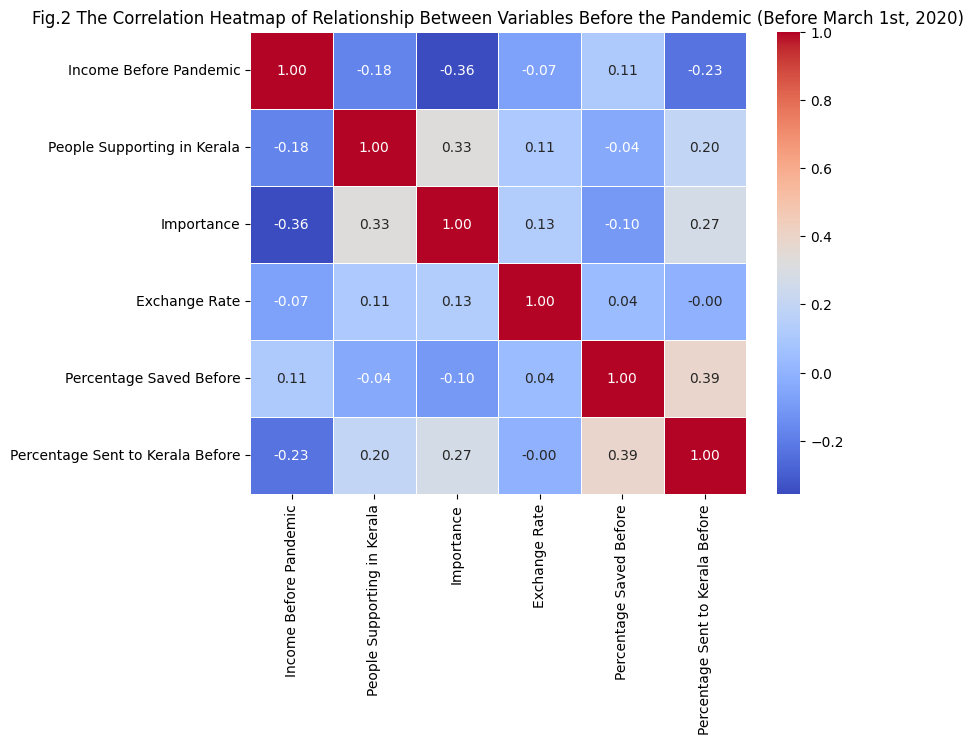

In [24]:
before_corr_matrix = before_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(before_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Fig.2 The Correlation Heatmap of Relationship Between Variables Before the Pandemic (Before March 1st, 2020)")
plt.show()

We create this correlation matric using a coding library claled matplotlib– which is most commonly used for graphical representations.

Now, let's explain what a correlation matrix is. It calculates the Pearson Correlation Coefficient (r) in-between every single variable in the dataframe. The Pearson Correlation Coefficient (r)  is a measure of how strong the **linear** correlation between two variables is.

This r will always be a value between 1 and -1. If r is positive, then if one variable increases the other variable increases. If r is negative, if one variable increases the other variable decreases.

The closer r is to 1, or -1, then the stronger the correlation. The closer to 0, the weaker the relationship.

Notice that when we compare the correlation coefficeint between both of the same variables it is always 1.0. This is beacuse a variable must be corrleated to itself, by definition.

When we look at the correlation coeffiecents of the other values, we can see that most of the relationships are rather weak.

That doesn't mean that there isn't a relationship– it's just that the relationship isn't linear.

Now, let's also make a heatmap for During the Panedemic as well.

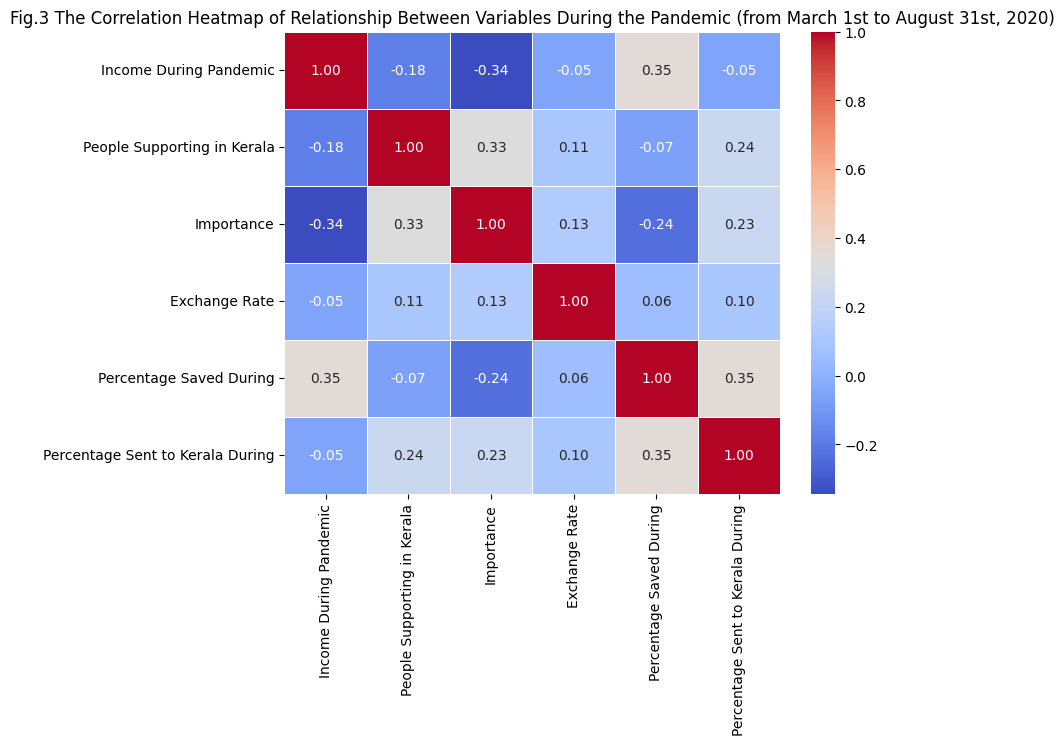

In [25]:
during_corr_matrix = during_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(during_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Fig.3 The Correlation Heatmap of Relationship Between Variables During the Pandemic (from March 1st to August 31st, 2020)")
plt.show()

Here, we see the same problem– none of the variables have a strong linear relationship with the graph. Let's investigate this a bit more.

## Independent Variable: Income Before and During the Pandemic

Lets plot a scatterplot with a line of best fit where our independent variables is the income before/during the pandemic and the dependent variables are the Percentage of Income Saved and Percentage of Income Sent to Kerala Before the Pandemic.

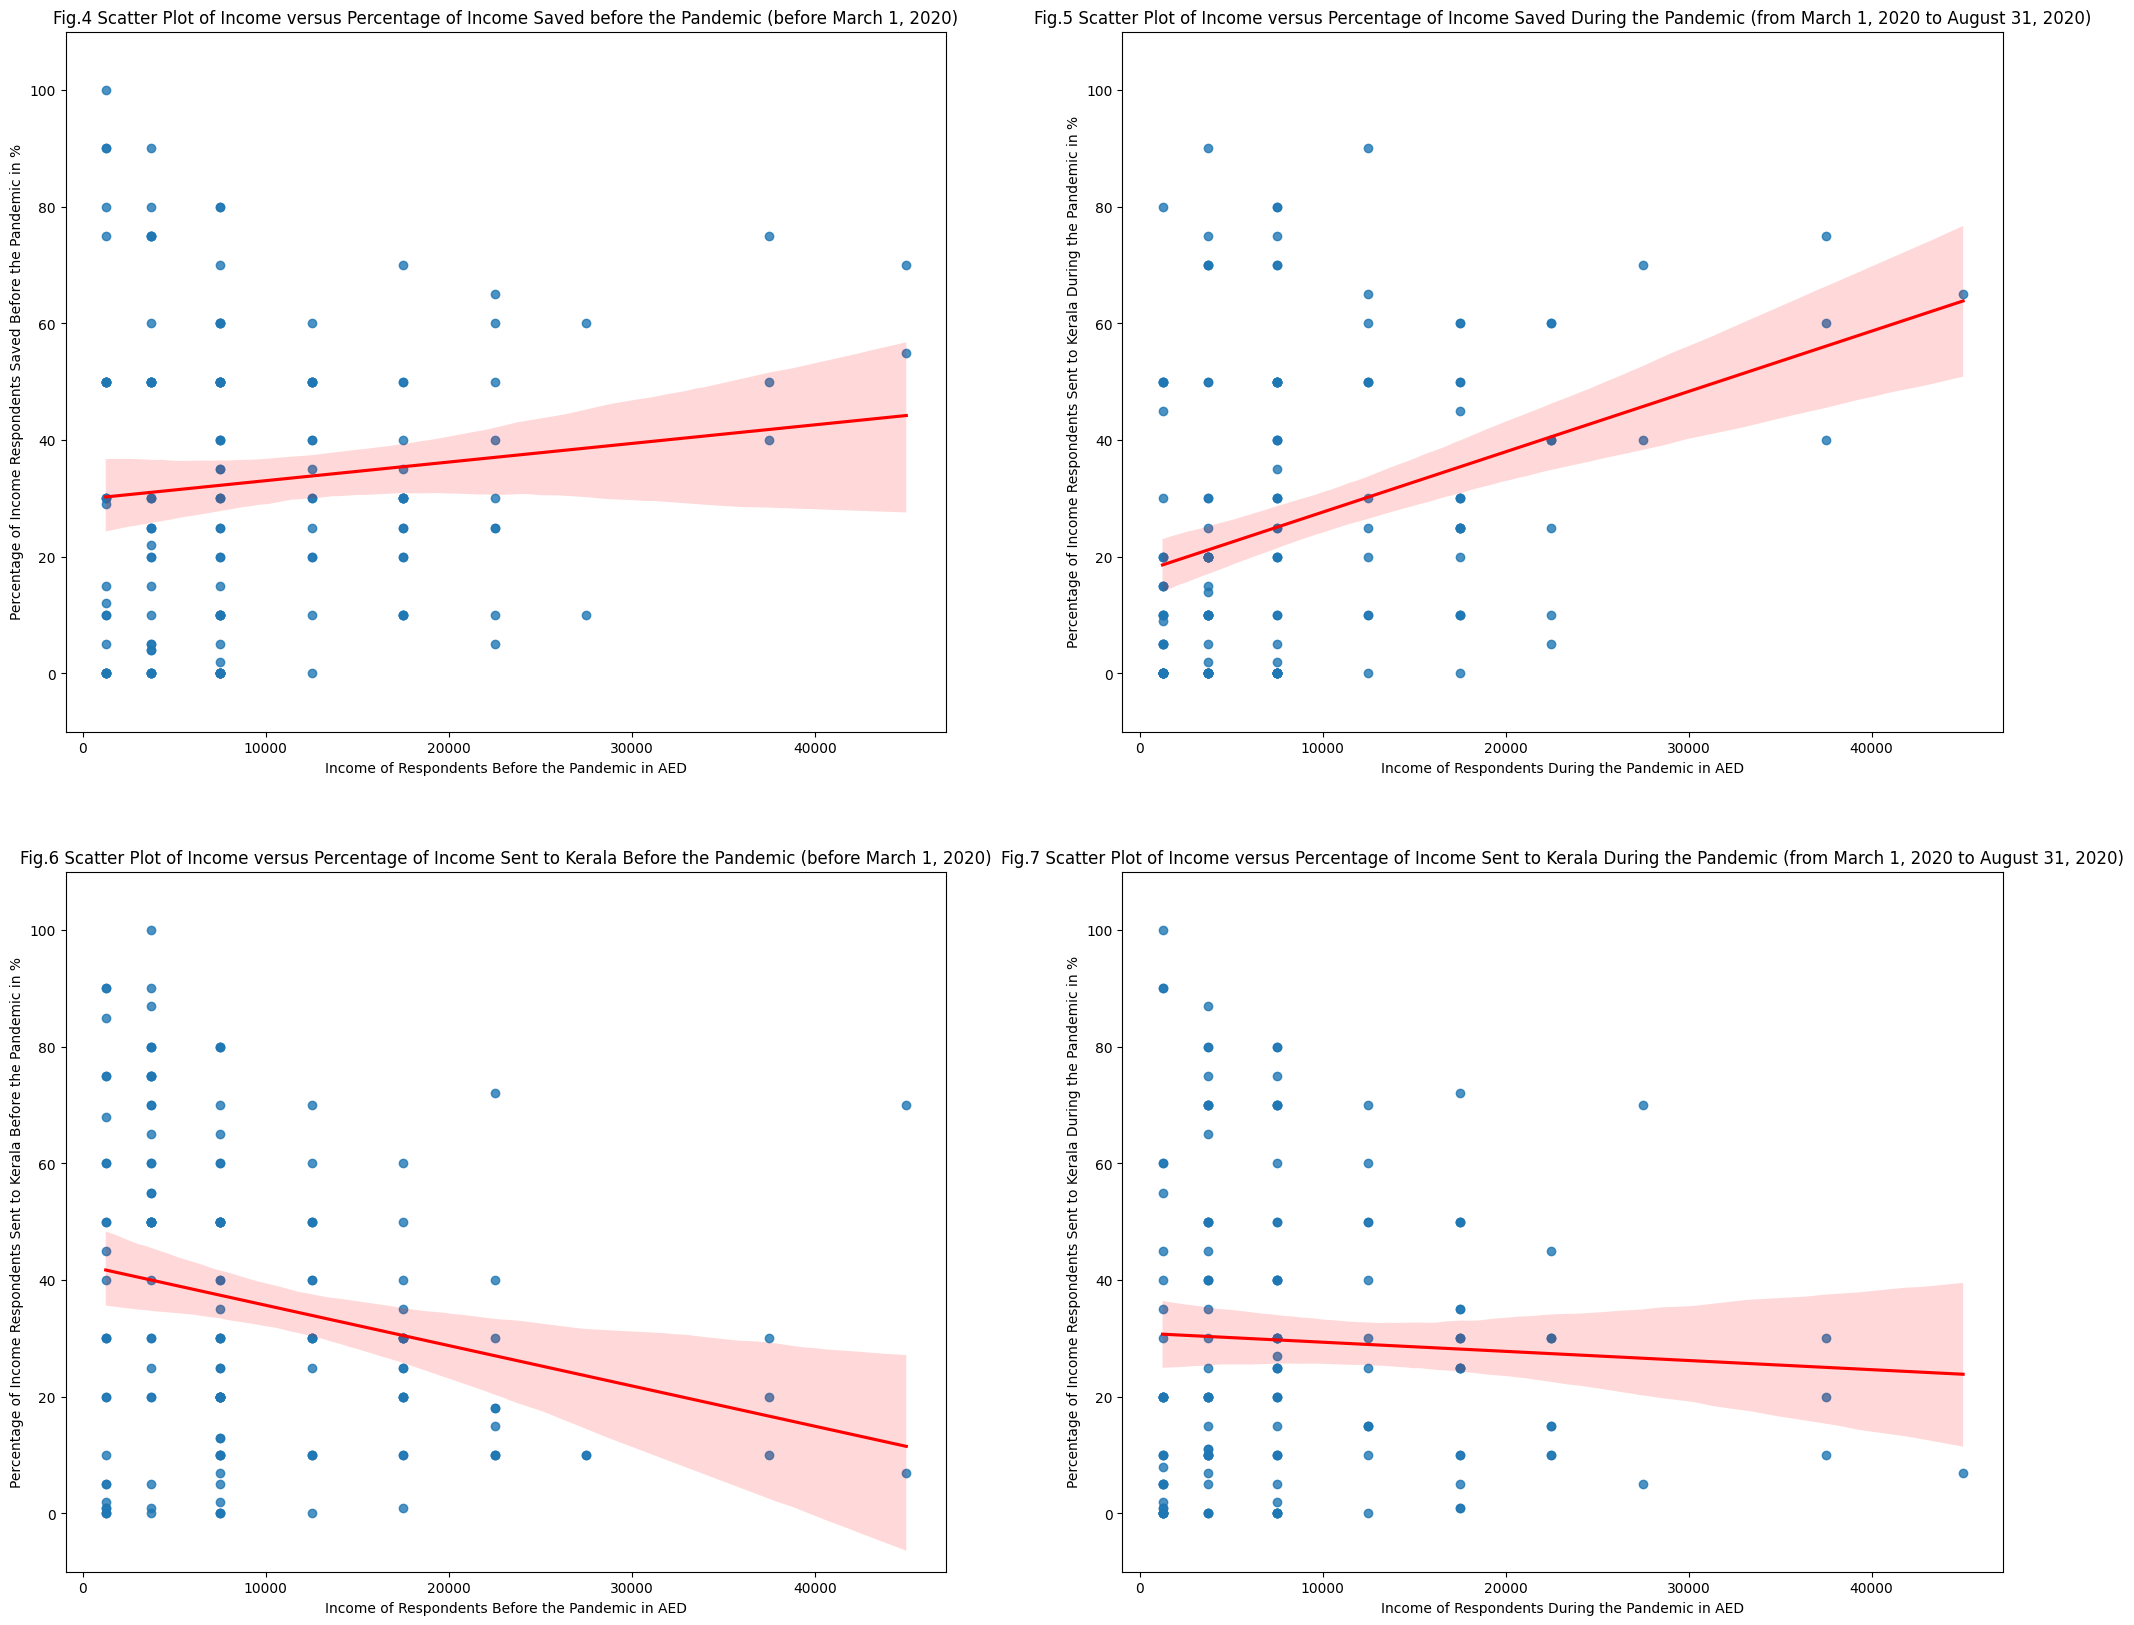

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

sns.regplot(x='Income Before Pandemic', y='Percentage Saved Before', data=before_df, line_kws={'color': 'red'}, ax=axes[0, 0])
axes[0, 0].set_title("Fig.4 Scatter Plot of Income versus Percentage of Income Saved before the Pandemic (before March 1, 2020)")
axes[0, 0].set_xlabel("Income of Respondents Before the Pandemic in AED")
axes[0, 0].set_ylabel("Percentage of Income Respondents Saved Before the Pandemic in %")
axes[0, 0].set_ylim(-10, 110)

sns.regplot(x='Income During Pandemic', y='Percentage Saved During', data=during_df, line_kws={'color': 'red'}, ax=axes[0, 1])
axes[0, 1].set_title("Fig.5 Scatter Plot of Income versus Percentage of Income Saved During the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[0, 1].set_xlabel("Income of Respondents During the Pandemic in AED")
axes[0, 1].set_ylabel("Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[0, 1].set_ylim(-10, 110)

sns.regplot(x='Income Before Pandemic', y='Percentage Sent to Kerala Before', data=before_df, line_kws={'color': 'red'}, ax=axes[1, 0])
axes[1, 0].set_title("Fig.6 Scatter Plot of Income versus Percentage of Income Sent to Kerala Before the Pandemic (before March 1, 2020)")
axes[1, 0].set_xlabel("Income of Respondents Before the Pandemic in AED")
axes[1, 0].set_ylabel("Percentage of Income Respondents Sent to Kerala Before the Pandemic in %")
axes[1, 0].set_ylim(-10, 110)

sns.regplot(x='Income During Pandemic', y='Percentage Sent to Kerala During', data=during_df, line_kws={'color': 'red'}, ax=axes[1, 1])
axes[1, 1].set_title("Fig.7 Scatter Plot of Income versus Percentage of Income Sent to Kerala During the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[1, 1].set_xlabel("Income of Respondents During the Pandemic in AED")
axes[1, 1].set_ylabel("Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[1, 1].set_ylim(-10, 110)
plt.show()

**DISCLAIMER:**
*Notice that every y-axis has the same range of values– this is actually a specified decision choice by me. If the range of y-values is different between graphs, you might misinterpret the results. That an important detail you should pay attention to about graphs.*

These scatter plots are created by a library called Seaborn– an extended version of Matplotlib that offers more varied graphs to utilize.

Fig.4 and Fig.5 tell us

1.   That before and during the pandemic, it seems that as income increases, the percentage of income saved increases

2.  It seems that during the Pandemic, the trendline becomes steeper. This indicates that during the pandemic, the more income an exptraite Keralite had, a higher percentage of their income they saved as opposed to before the pandemic.

Fig.6 and Fig.7 tell us

1.   That before and during the pandemic, it seems that as income increases, the percentage of income sent to Kerala decreases

2.  It seems that during the Pandemic, the trendline becomes more shallow. This indicates that during the pandemic, the more income an exptraite Keralite had, they would send a lower percentage of their income they saved as opposed to before the pandemic.

However, this isn't sufficeint analysis. It's a good starting point for continued analyssi– it gives us an idea of what the relationships will be. But, it isn't the best way to understand the data.

Its very obvious that the data points don't seem to have a very strong linear relationship. In fact, the lines of best fit don't represent the data at all.

The reason we see this type of behavior is because of the fact that because we have only 10 possible income categories– as seen in the cleaning. Each of these categories can be related to various different percentages of income saved or sent to Kerala.

A linear relationship is typically a one-to-one relationship– so every input must map to a single output. If the above truly was a linear relationship, then each income category should only be related to a few percentage points.

So, let's try representing the data in a different way.



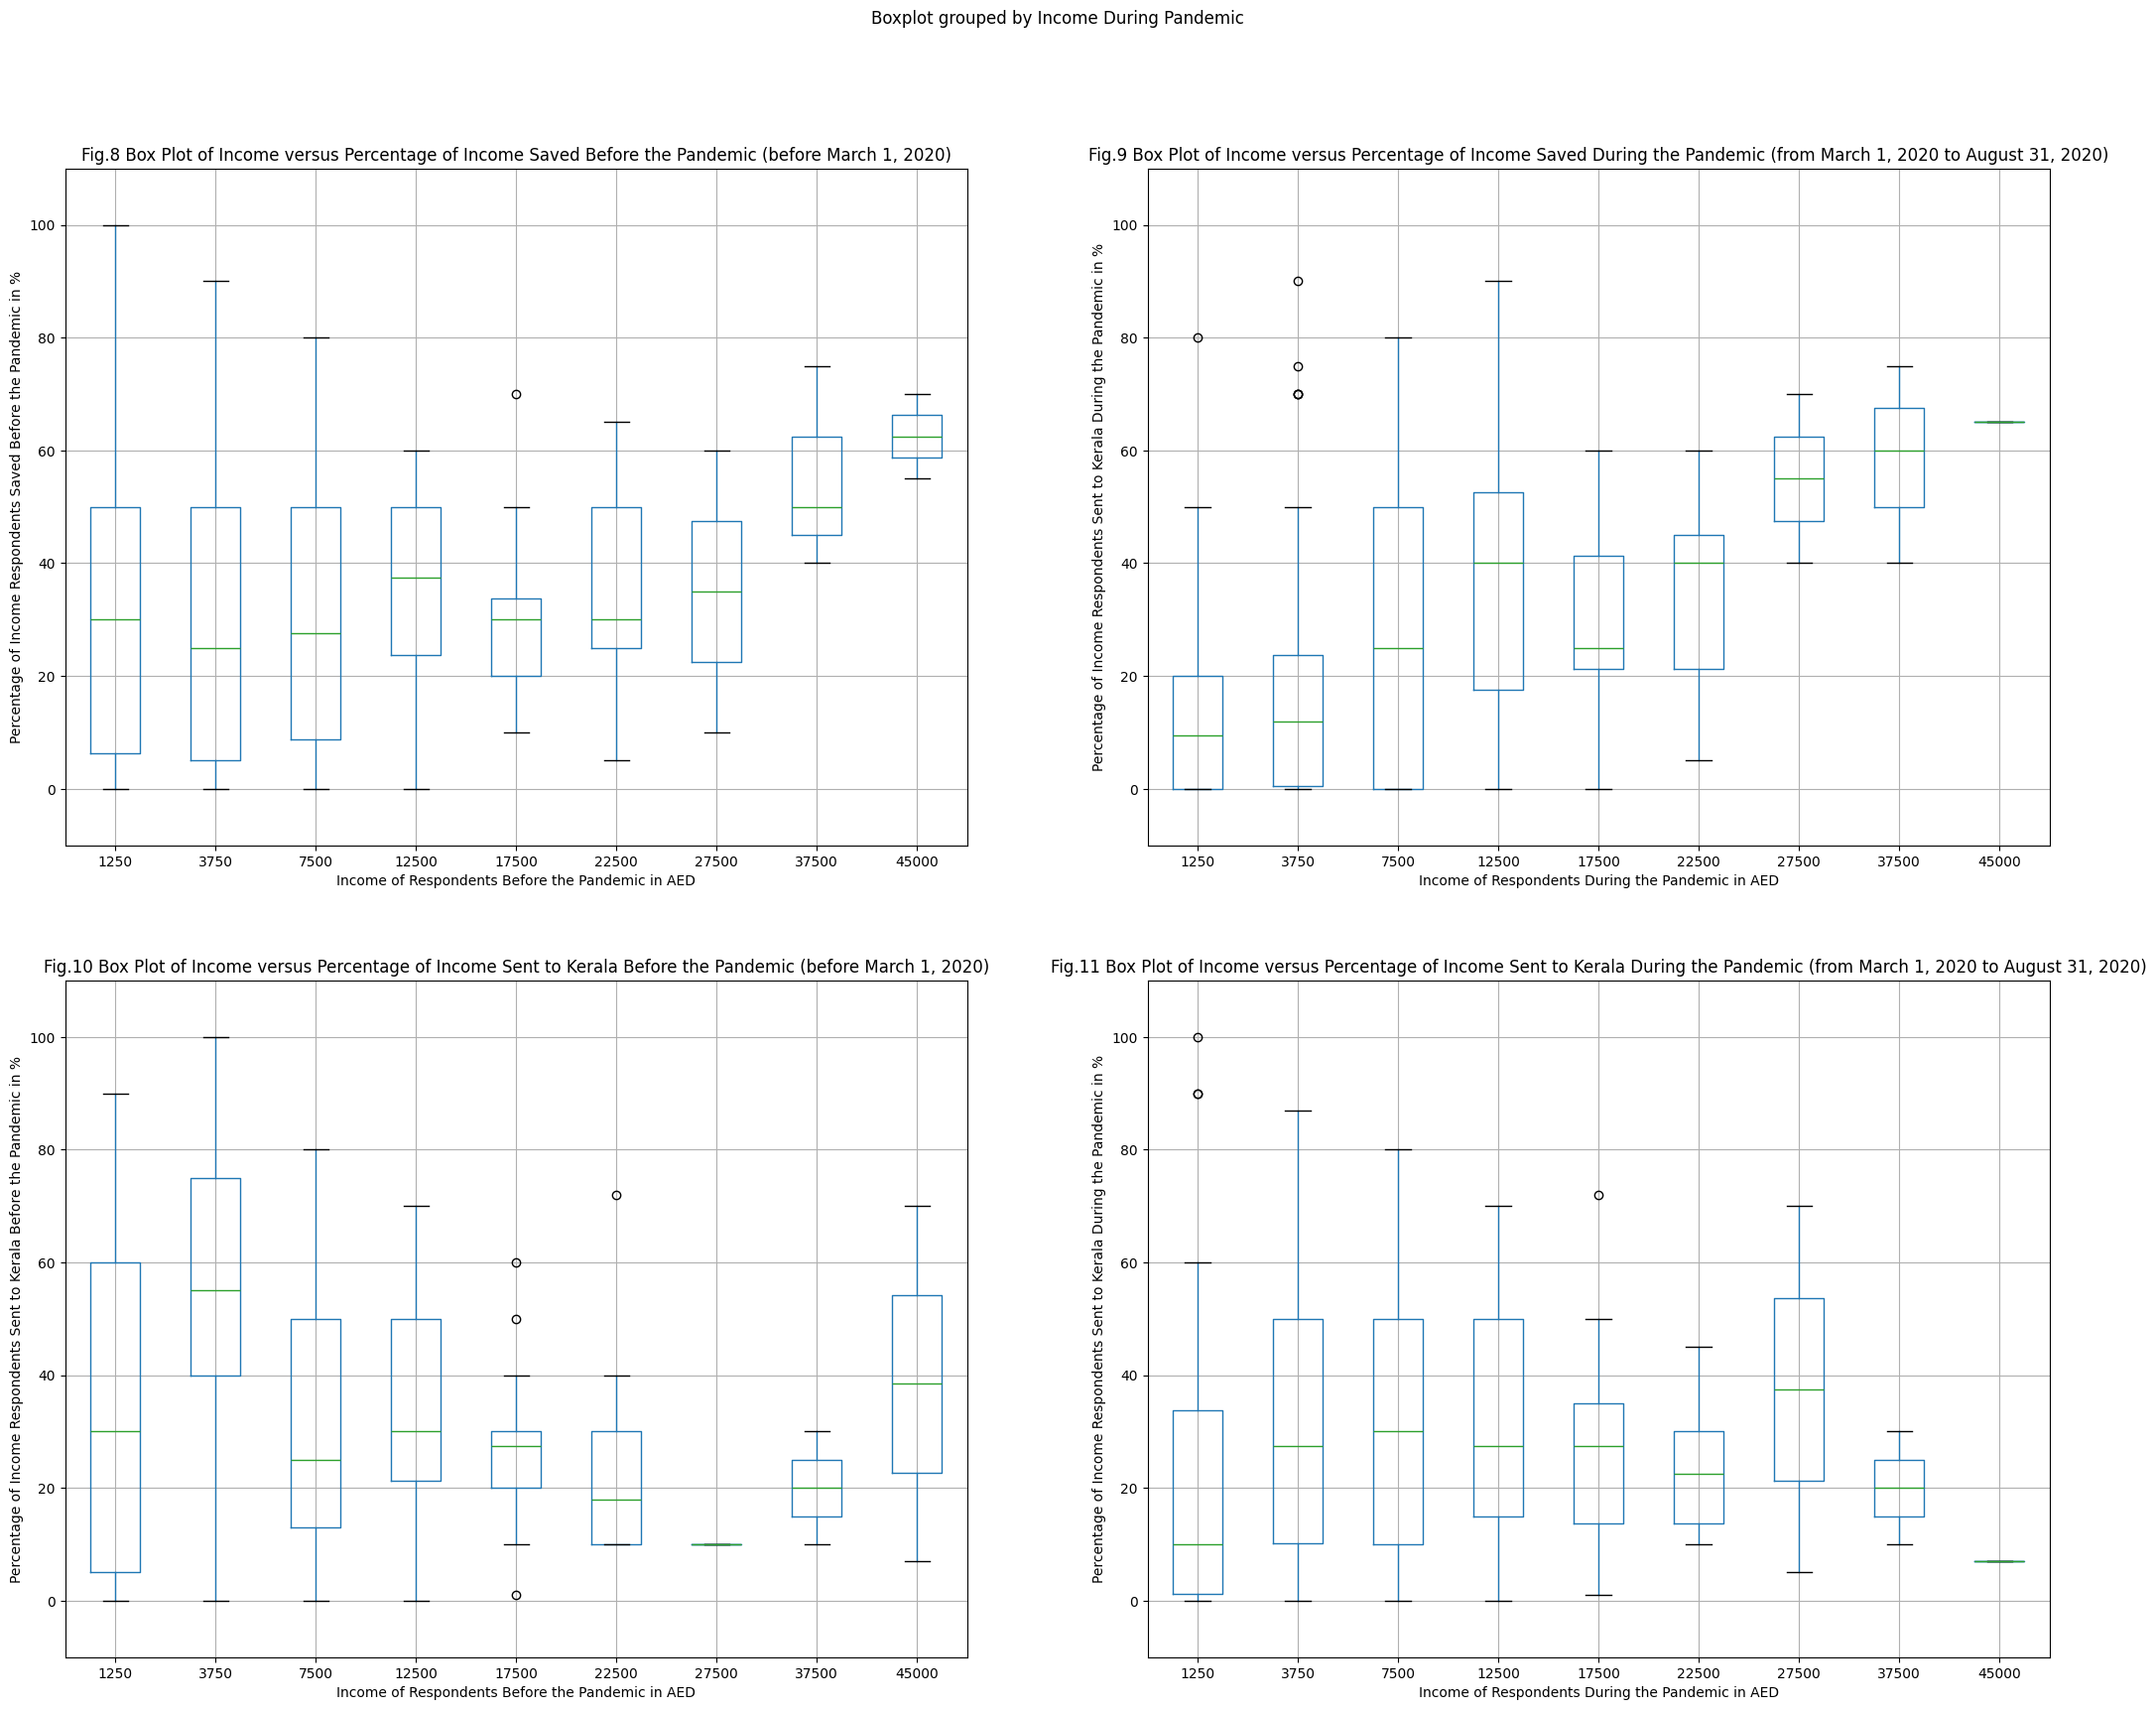

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

before_df.boxplot(by='Income Before Pandemic', column='Percentage Saved Before', ax=axes[0, 0])
axes[0, 0].set_title("Fig.8 Box Plot of Income versus Percentage of Income Saved Before the Pandemic (before March 1, 2020)")
axes[0, 0].set_xlabel("Income of Respondents Before the Pandemic in AED")
axes[0, 0].set_ylabel("Percentage of Income Respondents Saved Before the Pandemic in %")
axes[0, 0].set_ylim(-10, 110)

during_df.boxplot(by='Income During Pandemic', column='Percentage Saved During', ax=axes[0, 1])
axes[0, 1].set_title("Fig.9 Box Plot of Income versus Percentage of Income Saved During the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[0, 1].set_xlabel("Income of Respondents During the Pandemic in AED")
axes[0, 1].set_ylabel("Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[0, 1].set_ylim(-10, 110)

before_df.boxplot(by='Income Before Pandemic', column='Percentage Sent to Kerala Before', ax=axes[1, 0])
axes[1, 0].set_title("Fig.10 Box Plot of Income versus Percentage of Income Sent to Kerala Before the Pandemic (before March 1, 2020)")
axes[1, 0].set_xlabel("Income of Respondents Before the Pandemic in AED")
axes[1, 0].set_ylabel("Percentage of Income Respondents Sent to Kerala Before the Pandemic in %")
axes[1, 0].set_ylim(-10, 110)

during_df.boxplot(by='Income During Pandemic', column='Percentage Sent to Kerala During', ax=axes[1, 1])
axes[1, 1].set_title("Fig.11 Box Plot of Income versus Percentage of Income Sent to Kerala During the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[1, 1].set_xlabel("Income of Respondents During the Pandemic in AED")
axes[1, 1].set_ylabel("Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[1, 1].set_ylim(-10, 110)

plt.show()

Now, we represent the percentage points for each income category with a box plot. Box plots help represent the distribution of data points. Here's how we can interpret them:

1. The box in the middle represents the *Interquartile Range*. This is the middle 50% of data.
    1. The blue line at the bottom represents the *Lower Quartile*. 25% of data points for the category is on or below this line.
    2. The blue line at the top represents the *Upper Quartile*. 75% of data points for the category is on or below this line.
    3. The green line in the middle represents the *Median*. 50% of data points for the category is on or below this line.

2. The outward lines– or whiskers– are supposed to represent all the data points outside of the middle 50%. However you notice that beyond that sometimes there are points beyond these lines. This because any point beyond the whiskers are mathematically defined as outliers.

So, lets compare the box plots in-between Fig.8 and Fig.9:

1.   In general, we can see that the pandemic seems to shift each box plot down more– in particular each box for the income category drops closer to zero

2. However, while the median percentage of income saved before the pandemic seems relatively similar for most income categorys (except for the two highest) in Fig.8, in Fig.9 it seems that the median percentage of income saved increases with the income category.

Let us also compare the box plots in-between Fig.10 and Fig.11:



1.   It seems that the box plots seem to either shift down or stay the same when going from Fig.10 and Fig.11. In particular, 7500 AED, 1250 AED, 22500 AED and 37500 AED categories seem to be relatively unaffected. The rest experience significant drops.
2.   Before the pandemic, it seems that percentage of income sent to Kerala decreases as income increases until the 27500 AED category. Then it starts increasing after that. However, during the pandemic this predilection seems to disappear


So, now we have a better picture of the relationship between each group. But, we still don't have a clear idea of the affect of income in-between each.

So lets compare the average percentage of income saved/sent to Kerala for each income category.




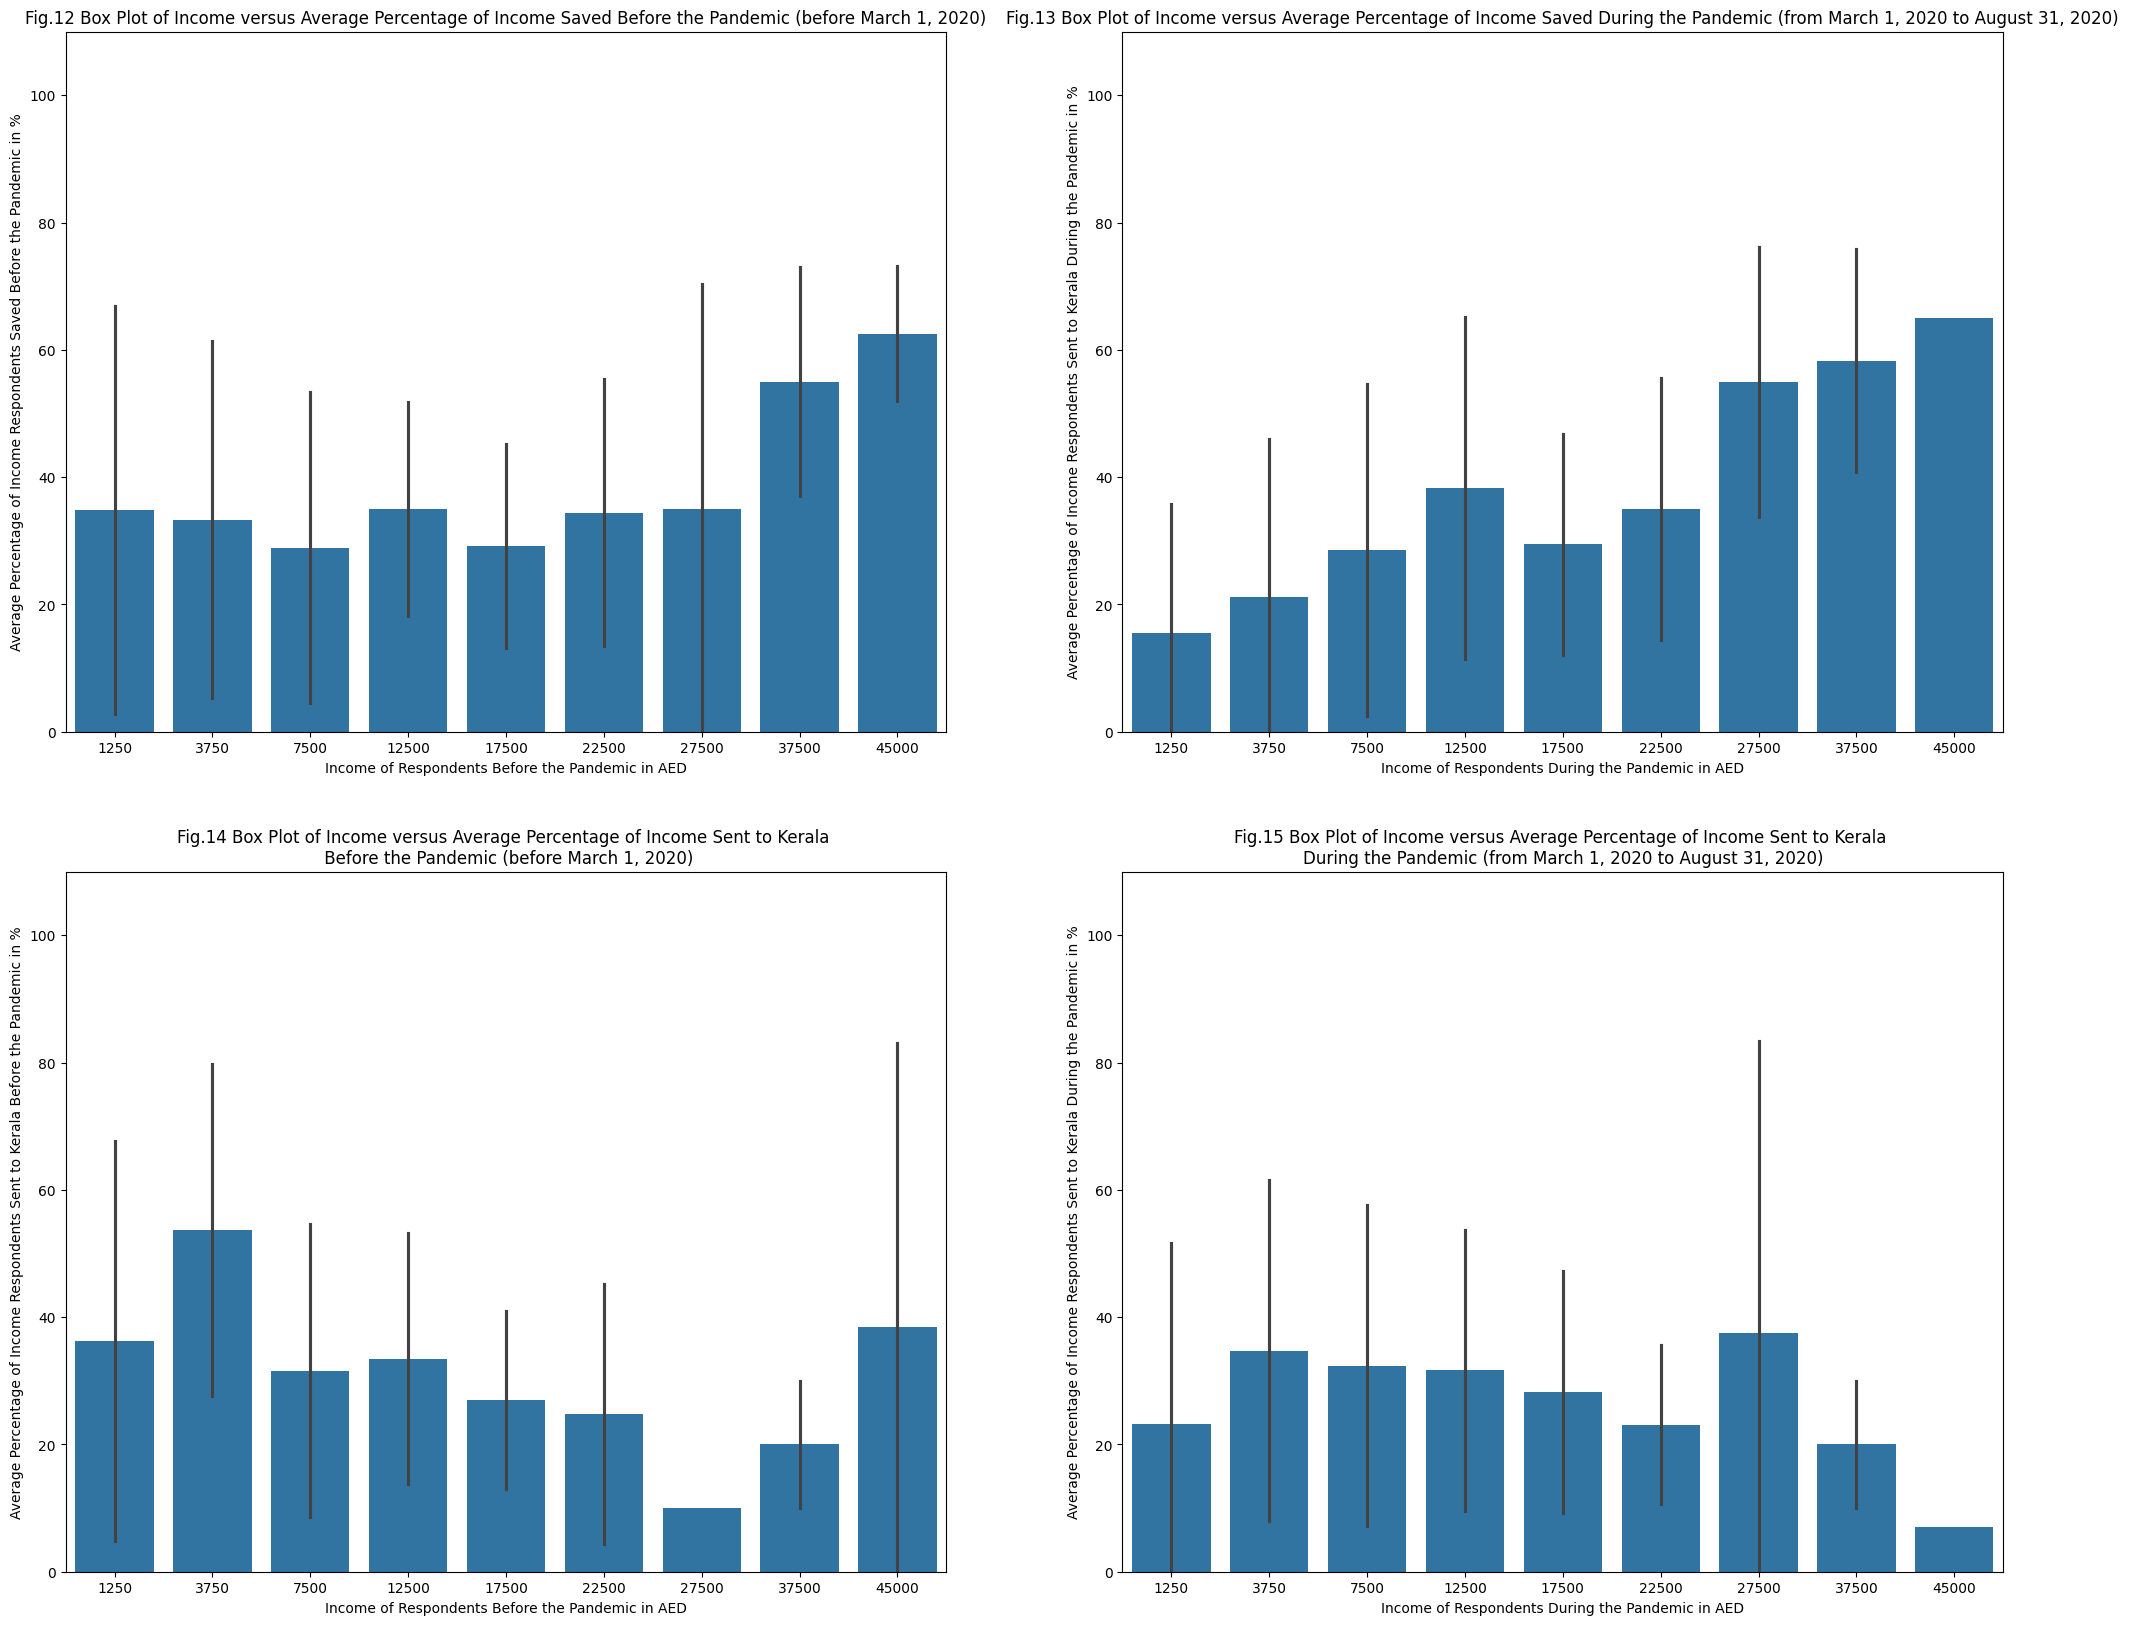

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

sns.barplot(x='Income Before Pandemic', y='Percentage Saved Before', data=before_df, estimator='mean', errorbar='sd', ax=axes[0, 0])
axes[0, 0].set_title("Fig.12 Box Plot of Income versus Average Percentage of Income Saved Before the Pandemic (before March 1, 2020)")
axes[0, 0].set_xlabel("Income of Respondents Before the Pandemic in AED")
axes[0, 0].set_ylabel("Average Percentage of Income Respondents Saved Before the Pandemic in %")
axes[0, 0].set_ylim(0, 110)

sns.barplot(x='Income During Pandemic', y='Percentage Saved During', data=during_df, estimator='mean', errorbar='sd', ax=axes[0, 1])
axes[0, 1].set_title("Fig.13 Box Plot of Income versus Average Percentage of Income Saved During the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[0, 1].set_xlabel("Income of Respondents During the Pandemic in AED")
axes[0, 1].set_ylabel("Average Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[0, 1].set_ylim(0, 110)

sns.barplot(x='Income Before Pandemic', y='Percentage Sent to Kerala Before', data=before_df, estimator='mean', errorbar='sd', ax=axes[1, 0])
axes[1, 0].set_title("Fig.14 Box Plot of Income versus Average Percentage of Income Sent to Kerala \n Before the Pandemic (before March 1, 2020)")
axes[1, 0].set_xlabel("Income of Respondents Before the Pandemic in AED")
axes[1, 0].set_ylabel("Average Percentage of Income Respondents Sent to Kerala Before the Pandemic in %")
axes[1, 0].set_ylim(0, 110)

sns.barplot(x='Income During Pandemic', y='Percentage Sent to Kerala During', data=during_df, estimator='mean', errorbar='sd', ax=axes[1, 1])
axes[1, 1].set_title("Fig.15 Box Plot of Income versus Average Percentage of Income Sent to Kerala \nDuring the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[1, 1].set_xlabel("Income of Respondents During the Pandemic in AED")
axes[1, 1].set_ylabel("Average Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[1, 1].set_ylim(0, 110)
plt.show()

These new figures are boxplots– the y-value represents the average percentage of income saved. The black lines represent error bars– avidual rewpresentation of how uncertain we are in our average.

When we compare the averages, we get a similar result from the box plots– that while it seems average percantage of income saved seems to increase during the pandemic. We can also observe the same pattern in percentage of income sent to Kerala before the pandemic as before.

What is interesting to notice is that, despite the fact that percentage of Income sent to Kerala decreases during the pandemic– the lowe income categories still manage to send about 30-40% of their income back to Kerala. Although it is decreased from before, it is impressive to see this trend among the lower income workers.


However, those large error bars cast a lot of doubt on all our results. So, let us go through one more step to see if these observations are valid– an ANOVA test.

In [29]:
import scipy.stats as stats
import pandas as pd

# Example data: categories of income groups and their corresponding savings

# Perform ANOVA
_, p_value_1 = stats.f_oneway(
    before_df[before_df['Income Before Pandemic'] == 1250]['Percentage Saved Before'],
    before_df[before_df['Income Before Pandemic'] == 3750]['Percentage Saved Before'],
    before_df[before_df['Income Before Pandemic'] == 7500]['Percentage Saved Before'],
    before_df[before_df['Income Before Pandemic'] == 12500]['Percentage Saved Before'],
    before_df[before_df['Income Before Pandemic'] == 17500]['Percentage Saved Before'],
    before_df[before_df['Income Before Pandemic'] == 22500]['Percentage Saved Before'],
    before_df[before_df['Income Before Pandemic'] == 27500]['Percentage Saved Before'],
    before_df[before_df['Income Before Pandemic'] == 37500]['Percentage Saved Before'],
    before_df[before_df['Income Before Pandemic'] == 45000]['Percentage Saved Before']
)

_, p_value_2 = stats.f_oneway(
    during_df[during_df['Income During Pandemic'] == 1250]['Percentage Saved During'],
    during_df[during_df['Income During Pandemic'] == 3750]['Percentage Saved During'],
    during_df[during_df['Income During Pandemic'] == 7500]['Percentage Saved During'],
    during_df[during_df['Income During Pandemic'] == 12500]['Percentage Saved During'],
    during_df[during_df['Income During Pandemic'] == 17500]['Percentage Saved During'],
    during_df[during_df['Income During Pandemic'] == 22500]['Percentage Saved During'],
    during_df[during_df['Income During Pandemic'] == 27500]['Percentage Saved During'],
    during_df[during_df['Income During Pandemic'] == 37500]['Percentage Saved During'],
    during_df[during_df['Income During Pandemic'] == 45000]['Percentage Saved During']
)

_, p_value_3 = stats.f_oneway(
    before_df[before_df['Income Before Pandemic'] == 1250]['Percentage Sent to Kerala Before'],
    before_df[before_df['Income Before Pandemic'] == 3750]['Percentage Sent to Kerala Before'],
    before_df[before_df['Income Before Pandemic'] == 7500]['Percentage Sent to Kerala Before'],
    before_df[before_df['Income Before Pandemic'] == 12500]['Percentage Sent to Kerala Before'],
    before_df[before_df['Income Before Pandemic'] == 17500]['Percentage Sent to Kerala Before'],
    before_df[before_df['Income Before Pandemic'] == 22500]['Percentage Sent to Kerala Before'],
    before_df[before_df['Income Before Pandemic'] == 27500]['Percentage Sent to Kerala Before'],
    before_df[before_df['Income Before Pandemic'] == 37500]['Percentage Sent to Kerala Before'],
    before_df[before_df['Income Before Pandemic'] == 45000]['Percentage Sent to Kerala Before'],
)

_, p_value_4 = stats.f_oneway(
    during_df[during_df['Income During Pandemic'] == 1250]['Percentage Sent to Kerala During'],
    during_df[during_df['Income During Pandemic'] == 3750]['Percentage Sent to Kerala During'],
    during_df[during_df['Income During Pandemic'] == 7500]['Percentage Sent to Kerala During'],
    during_df[during_df['Income During Pandemic'] == 12500]['Percentage Sent to Kerala During'],
    during_df[during_df['Income During Pandemic'] == 17500]['Percentage Sent to Kerala During'],
    during_df[during_df['Income During Pandemic'] == 22500]['Percentage Sent to Kerala During'],
    during_df[during_df['Income During Pandemic'] == 27500]['Percentage Sent to Kerala During'],
    during_df[during_df['Income During Pandemic'] == 37500]['Percentage Sent to Kerala During'],
    during_df[during_df['Income During Pandemic'] == 45000]['Percentage Sent to Kerala During'],
)

df = pd.DataFrame({
    'Relationship': ['Income vs Percentage of Income Saved Before the Pandemic',
                     'Income vs Percentage of Income Saved During the Pandemic',
                     'Income vs Percentage of Income Sent to Kerala Before the Pandemic',
                     'Income vs Percentage of Income Sent to Kerala During the Pandemic'],
    'p-value': [p_value_1, p_value_2, p_value_3, p_value_4]
})

pd.set_option('display.max_colwidth', None)
df.head()

,Relationship,p-value
0,Income vs Percentage of Income Saved Before the Pandemic,0.545887
1,Income vs Percentage of Income Saved During the Pandemic,0.002231
2,Income vs Percentage of Income Sent to Kerala Before the Pandemic,0.001168
3,Income vs Percentage of Income Sent to Kerala During the Pandemic,0.604958


An ANOVA test a complicated piece of stastics– but it tells us whether the relationship between two variables is statistically sginificant or not.

This can be expressed through the p value. If the p value is less than 0.05, we have statistical significane. Otherwise, both variables aren't related.

From the table above we can see, just as we realized through out data representation above, that the only stastically significant results come from

1. Income vs Percentage of Income Saved During the Pandemic
2. Income vs Percentage of Income Sent to Kerala Before the Pandemic

So, the only things we can infer with confidence is that
1. During the pandemic, as income increases percentage saved increases. This result makes sense, as the more income you have, a higher percentage you can save.

2. Before the pandemic, as income increases (up until 27500 AED) percentage sent to Kerala decreases. After 27500 AED, percentage sent ot Kerala increases. The later increase could reflect increase in savings. It seems paradoxical that the lower your income the more you send back to Kerala, but it aligns with the nature of the expatriate Keralite population.

## Independent Variable: Importance of Sending Money to Kerala

Next, let us look at whether or not the indicated importance of sending money to Kerala impacts the behavior of the expatriates.

As a refresher, there are 4 grades of importance in sending money back to Kerala:

1. Very Unimportant (Family is capable to live without my remittances). This is denoted as '1'.
2. Unimportant (Family can support basic necessities even without my remittance). This is denoted as '2'.
3. Important (Family has some income but depends on my remittance to pull through). This is denoted as '3'
4. Very Important (Family is totally dependent on my remittances). This is denoted as '4'

In other words, importance looks at how necessary the remittances exppatriate Keralites send is for the livelihood of their families. This is a key variable, considering all the popular culture we know about the expatriate Keralites.

Let's develop some intutition with some scatter plots.

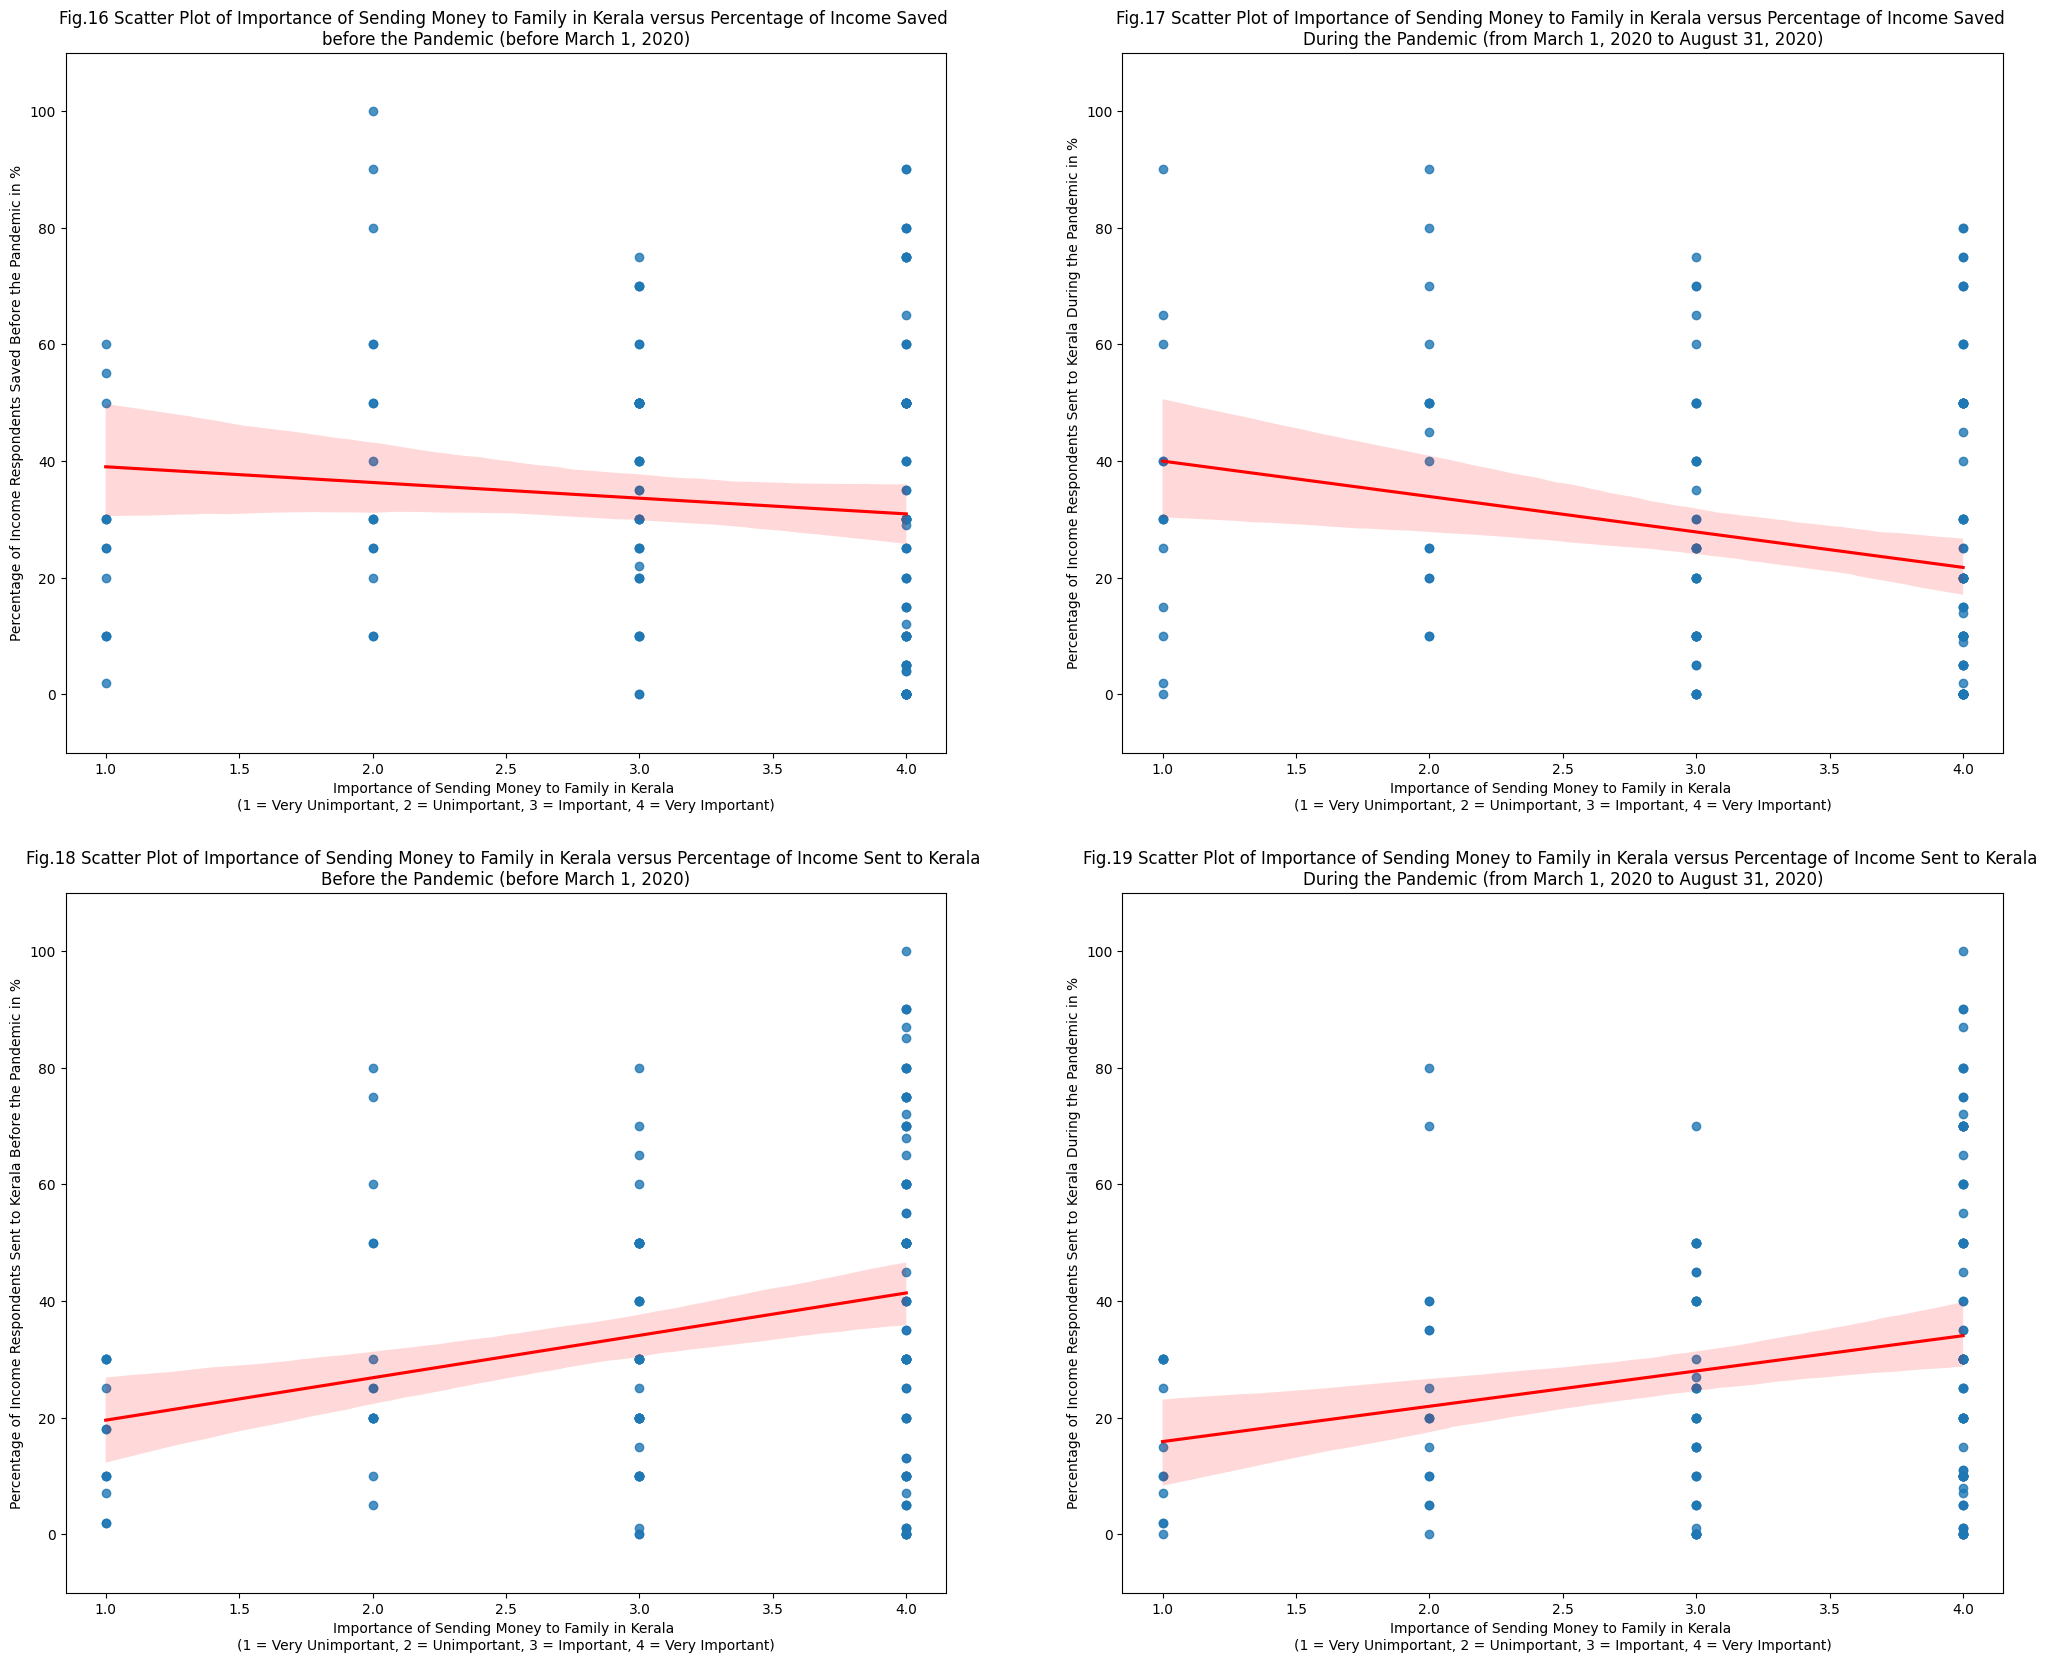

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

sns.regplot(x='Importance', y='Percentage Saved Before', data=before_df, line_kws={'color': 'red'}, ax=axes[0, 0])
axes[0, 0].set_title("Fig.16 Scatter Plot of Importance of Sending Money to Family in Kerala versus Percentage of Income Saved \nbefore the Pandemic (before March 1, 2020)")
axes[0, 0].set_xlabel("Importance of Sending Money to Family in Kerala \n(1 = Very Unimportant, 2 = Unimportant, 3 = Important, 4 = Very Important)")
axes[0, 0].set_ylabel("Percentage of Income Respondents Saved Before the Pandemic in %")
axes[0, 0].set_ylim(-10, 110)

sns.regplot(x='Importance', y='Percentage Saved During', data=during_df, line_kws={'color': 'red'}, ax=axes[0, 1])
axes[0, 1].set_title("Fig.17 Scatter Plot of Importance of Sending Money to Family in Kerala versus Percentage of Income Saved \nDuring the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[0, 1].set_xlabel("Importance of Sending Money to Family in Kerala \n(1 = Very Unimportant, 2 = Unimportant, 3 = Important, 4 = Very Important)")
axes[0, 1].set_ylabel("Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[0, 1].set_ylim(-10, 110)

sns.regplot(x='Importance', y='Percentage Sent to Kerala Before', data=before_df, line_kws={'color': 'red'}, ax=axes[1, 0])
axes[1, 0].set_title("Fig.18 Scatter Plot of Importance of Sending Money to Family in Kerala versus Percentage of Income Sent to Kerala \nBefore the Pandemic (before March 1, 2020)")
axes[1, 0].set_xlabel("Importance of Sending Money to Family in Kerala \n(1 = Very Unimportant, 2 = Unimportant, 3 = Important, 4 = Very Important)")
axes[1, 0].set_ylabel("Percentage of Income Respondents Sent to Kerala Before the Pandemic in %")
axes[1, 0].set_ylim(-10, 110)

sns.regplot(x='Importance', y='Percentage Sent to Kerala During', data=during_df, line_kws={'color': 'red'}, ax=axes[1, 1])
axes[1, 1].set_title("Fig.19 Scatter Plot of Importance of Sending Money to Family in Kerala versus Percentage of Income Sent to Kerala \nDuring the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[1, 1].set_xlabel("Importance of Sending Money to Family in Kerala \n(1 = Very Unimportant, 2 = Unimportant, 3 = Important, 4 = Very Important)")
axes[1, 1].set_ylabel("Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[1, 1].set_ylim(-10, 110)
plt.show()

We know Fig. 16 and Fig. 17 tell us


1.  Both before and during the pandemic, the more important it is for an expat to send money to their family, the less income they tend to save.
2.  The trendline during the pandemic seems slightly steeper during the pandemic, which indicates that the more important it is for an expat to send money to their family, the less income they save as opposed to before the pandemic.

Fig. 18 and Fig.19 tell us

1.  Both before and during the pandemic, the more important it is for an expat to send money to their family, a higher percentage of income they send to Kerala.
2.  Both trendlines in Fig.18 and Fig.19 are very similar– which indicate that expats behvaior sending money back to Kerala was similar before and during the pandemic.

With this intuition in mind, let us now look at some boxplots.


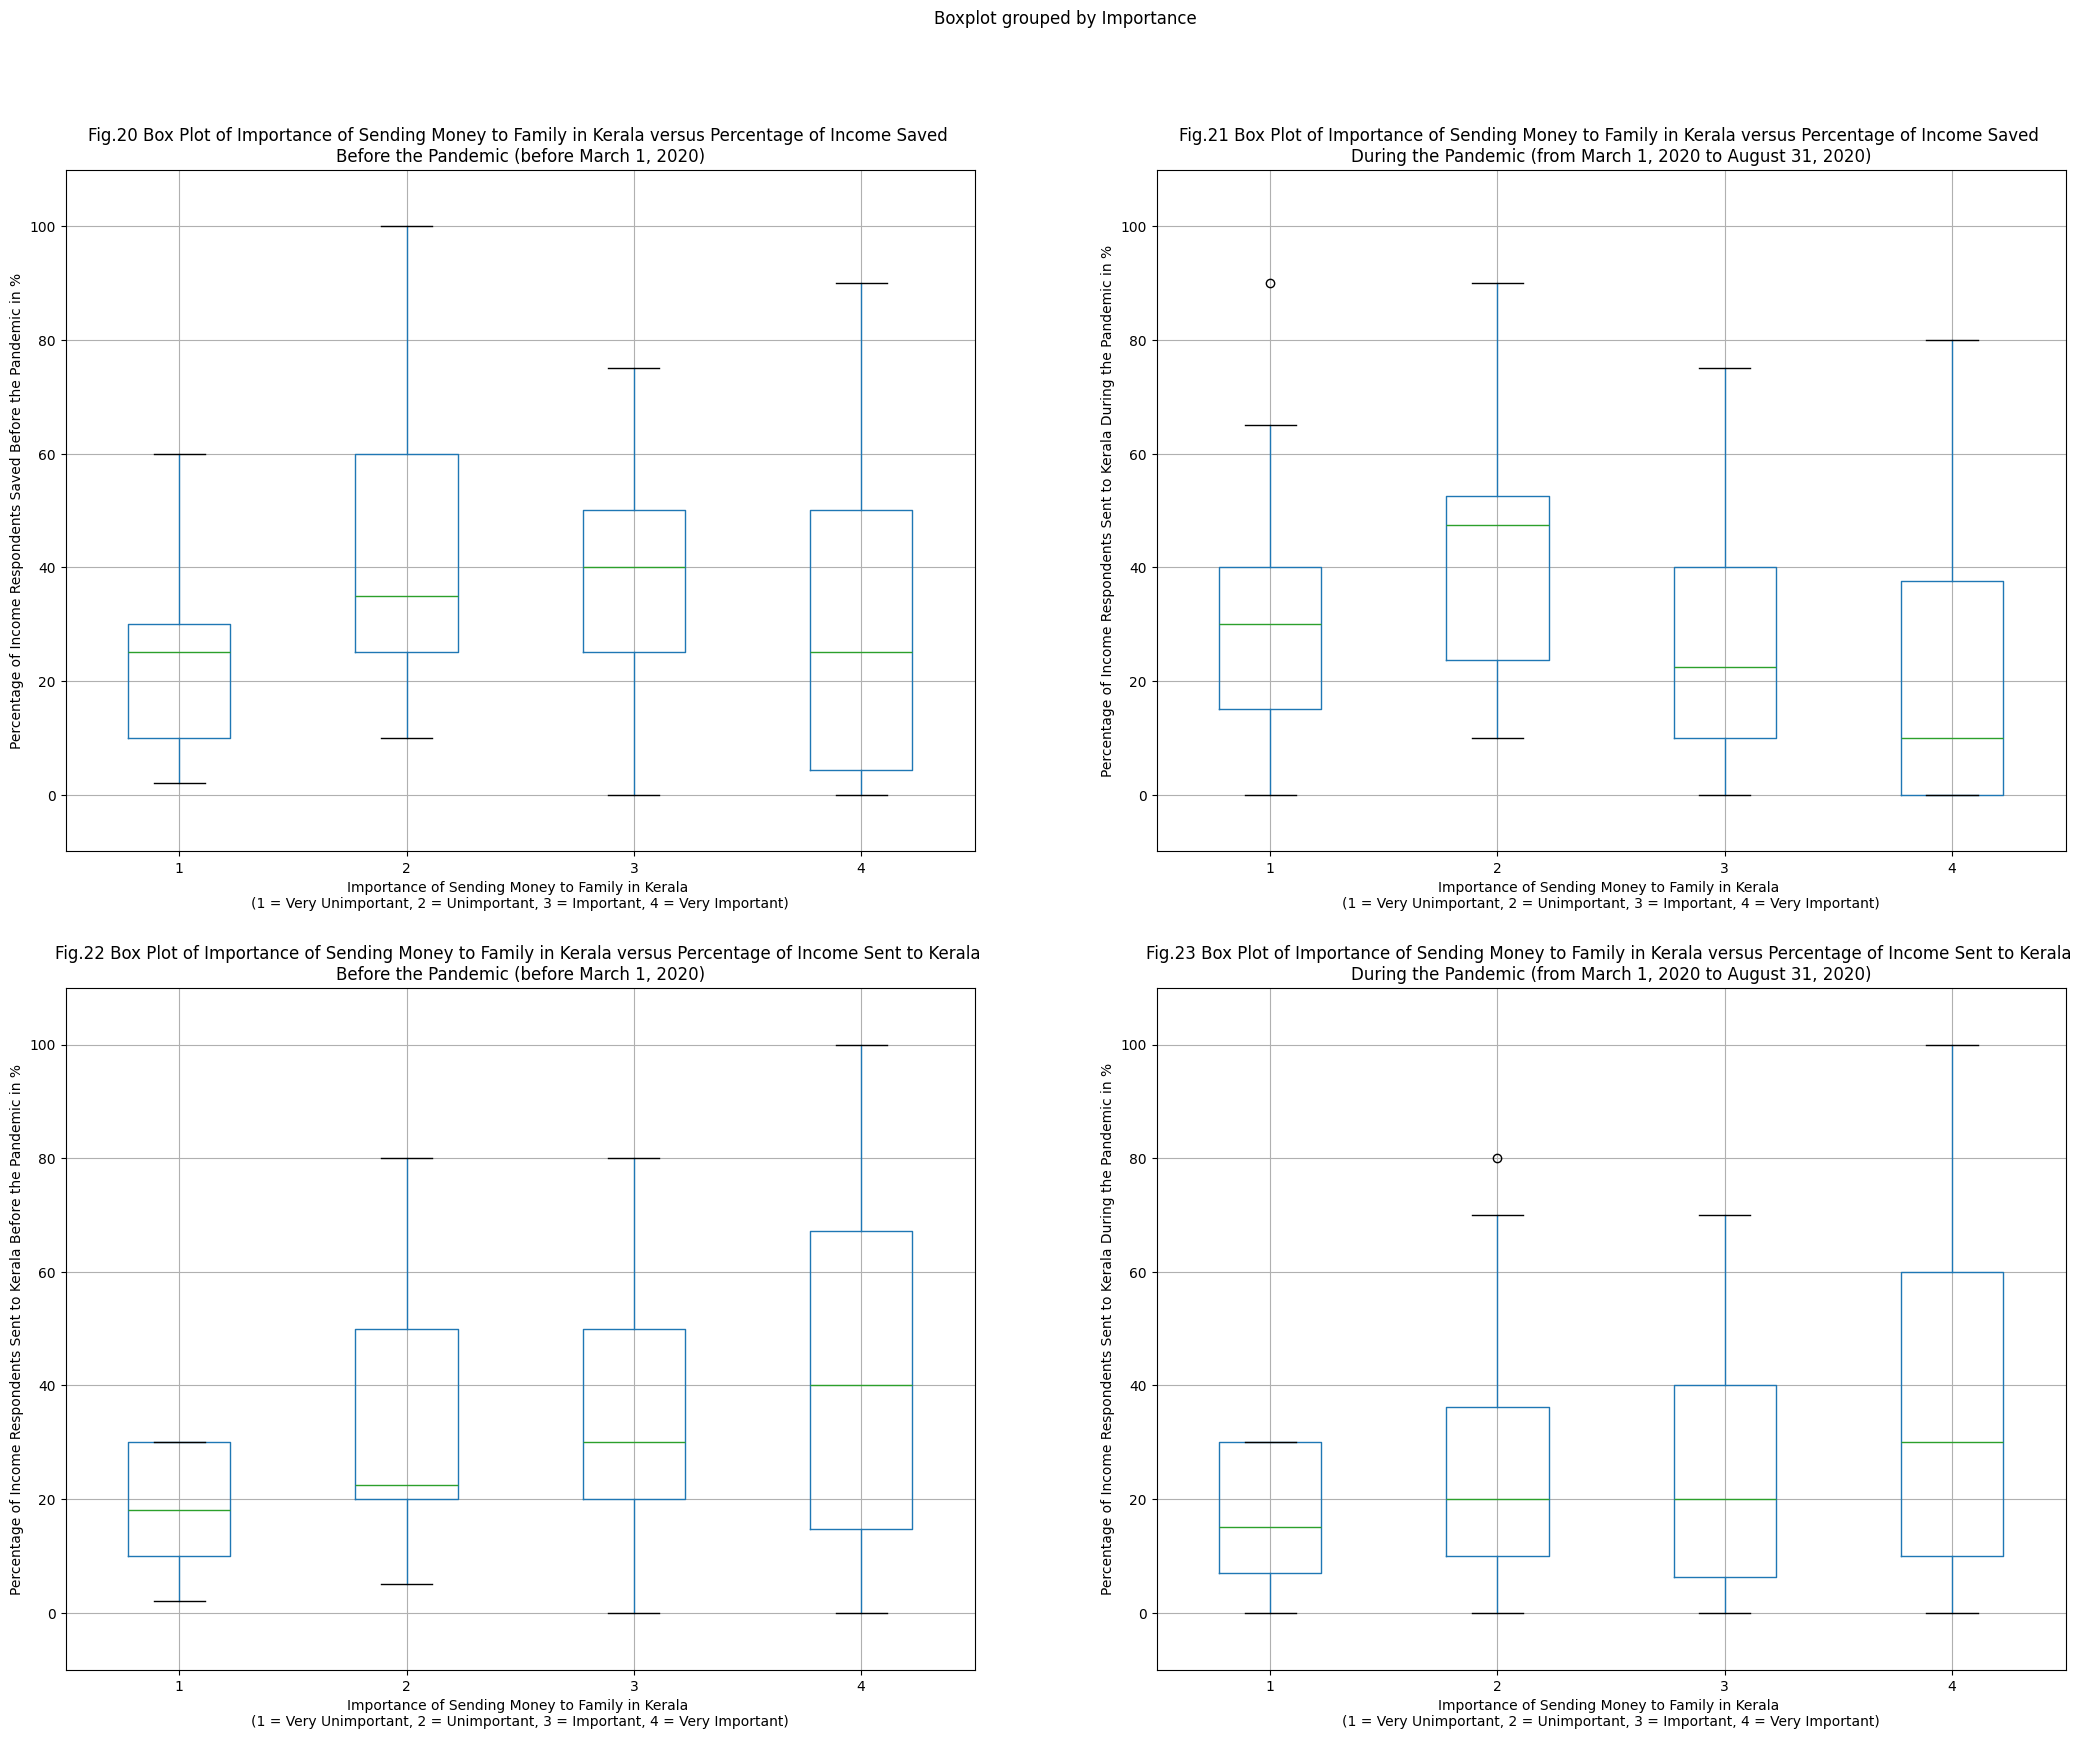

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

before_df.boxplot(by='Importance', column='Percentage Saved Before', ax=axes[0, 0])
axes[0, 0].set_title("Fig.20 Box Plot of Importance of Sending Money to Family in Kerala versus Percentage of Income Saved \nBefore the Pandemic (before March 1, 2020)")
axes[0, 0].set_xlabel("Importance of Sending Money to Family in Kerala \n(1 = Very Unimportant, 2 = Unimportant, 3 = Important, 4 = Very Important)")
axes[0, 0].set_ylabel("Percentage of Income Respondents Saved Before the Pandemic in %")
axes[0, 0].set_ylim(-10, 110)

during_df.boxplot(by='Importance', column='Percentage Saved During', ax=axes[0, 1])
axes[0, 1].set_title("Fig.21 Box Plot of Importance of Sending Money to Family in Kerala versus Percentage of Income Saved \nDuring the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[0, 1].set_xlabel("Importance of Sending Money to Family in Kerala \n(1 = Very Unimportant, 2 = Unimportant, 3 = Important, 4 = Very Important)")
axes[0, 1].set_ylabel("Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[0, 1].set_ylim(-10, 110)

before_df.boxplot(by='Importance', column='Percentage Sent to Kerala Before', ax=axes[1, 0])
axes[1, 0].set_title("Fig.22 Box Plot of Importance of Sending Money to Family in Kerala versus Percentage of Income Sent to Kerala \nBefore the Pandemic (before March 1, 2020)")
axes[1, 0].set_xlabel("Importance of Sending Money to Family in Kerala \n(1 = Very Unimportant, 2 = Unimportant, 3 = Important, 4 = Very Important)")
axes[1, 0].set_ylabel("Percentage of Income Respondents Sent to Kerala Before the Pandemic in %")
axes[1, 0].set_ylim(-10, 110)

during_df.boxplot(by='Importance', column='Percentage Sent to Kerala During', ax=axes[1, 1])
axes[1, 1].set_title("Fig.23 Box Plot of Importance of Sending Money to Family in Kerala versus Percentage of Income Sent to Kerala \nDuring the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[1, 1].set_xlabel("Importance of Sending Money to Family in Kerala \n(1 = Very Unimportant, 2 = Unimportant, 3 = Important, 4 = Very Important)")
axes[1, 1].set_ylabel("Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[1, 1].set_ylim(-10, 110)

plt.show()

Let us first examine the differences between Fig.20 and Fig.21:


1.   It seems that the pandemic has shifted all the box plots dwon– all the boxes are closer to zero, and we can notice a decrease in the median percentage of income saved for most categories (except importance grade 2)
2.   While before the pandemic there doesn't seem to be any noticeable link between the median percetange of income saved and importance grade, during the pandemic there is a marked shift– as importance grade increases, there is a noticeable decrease in median percentage of income saved.

Let us also examine the differences between Fig.22 and Fig.23:
1. Just like with Fig.20 and Fig.21, the pandemic seems to have shifted all of the box plots down.

2. In Fig.20, as importance grade increases, the median percentage of income sent to Kerala increases. We can see a similar trend in Fig.23– except during the pandemic median percentage of income sent to Kerala increases at a lower rate.

This mostly supports what our scatterplots say– in fact it ehcances the data by giving us a better understanding of how the data increases and how the dstributions change.

Let us analzye this relationship in greater depth using box plots.

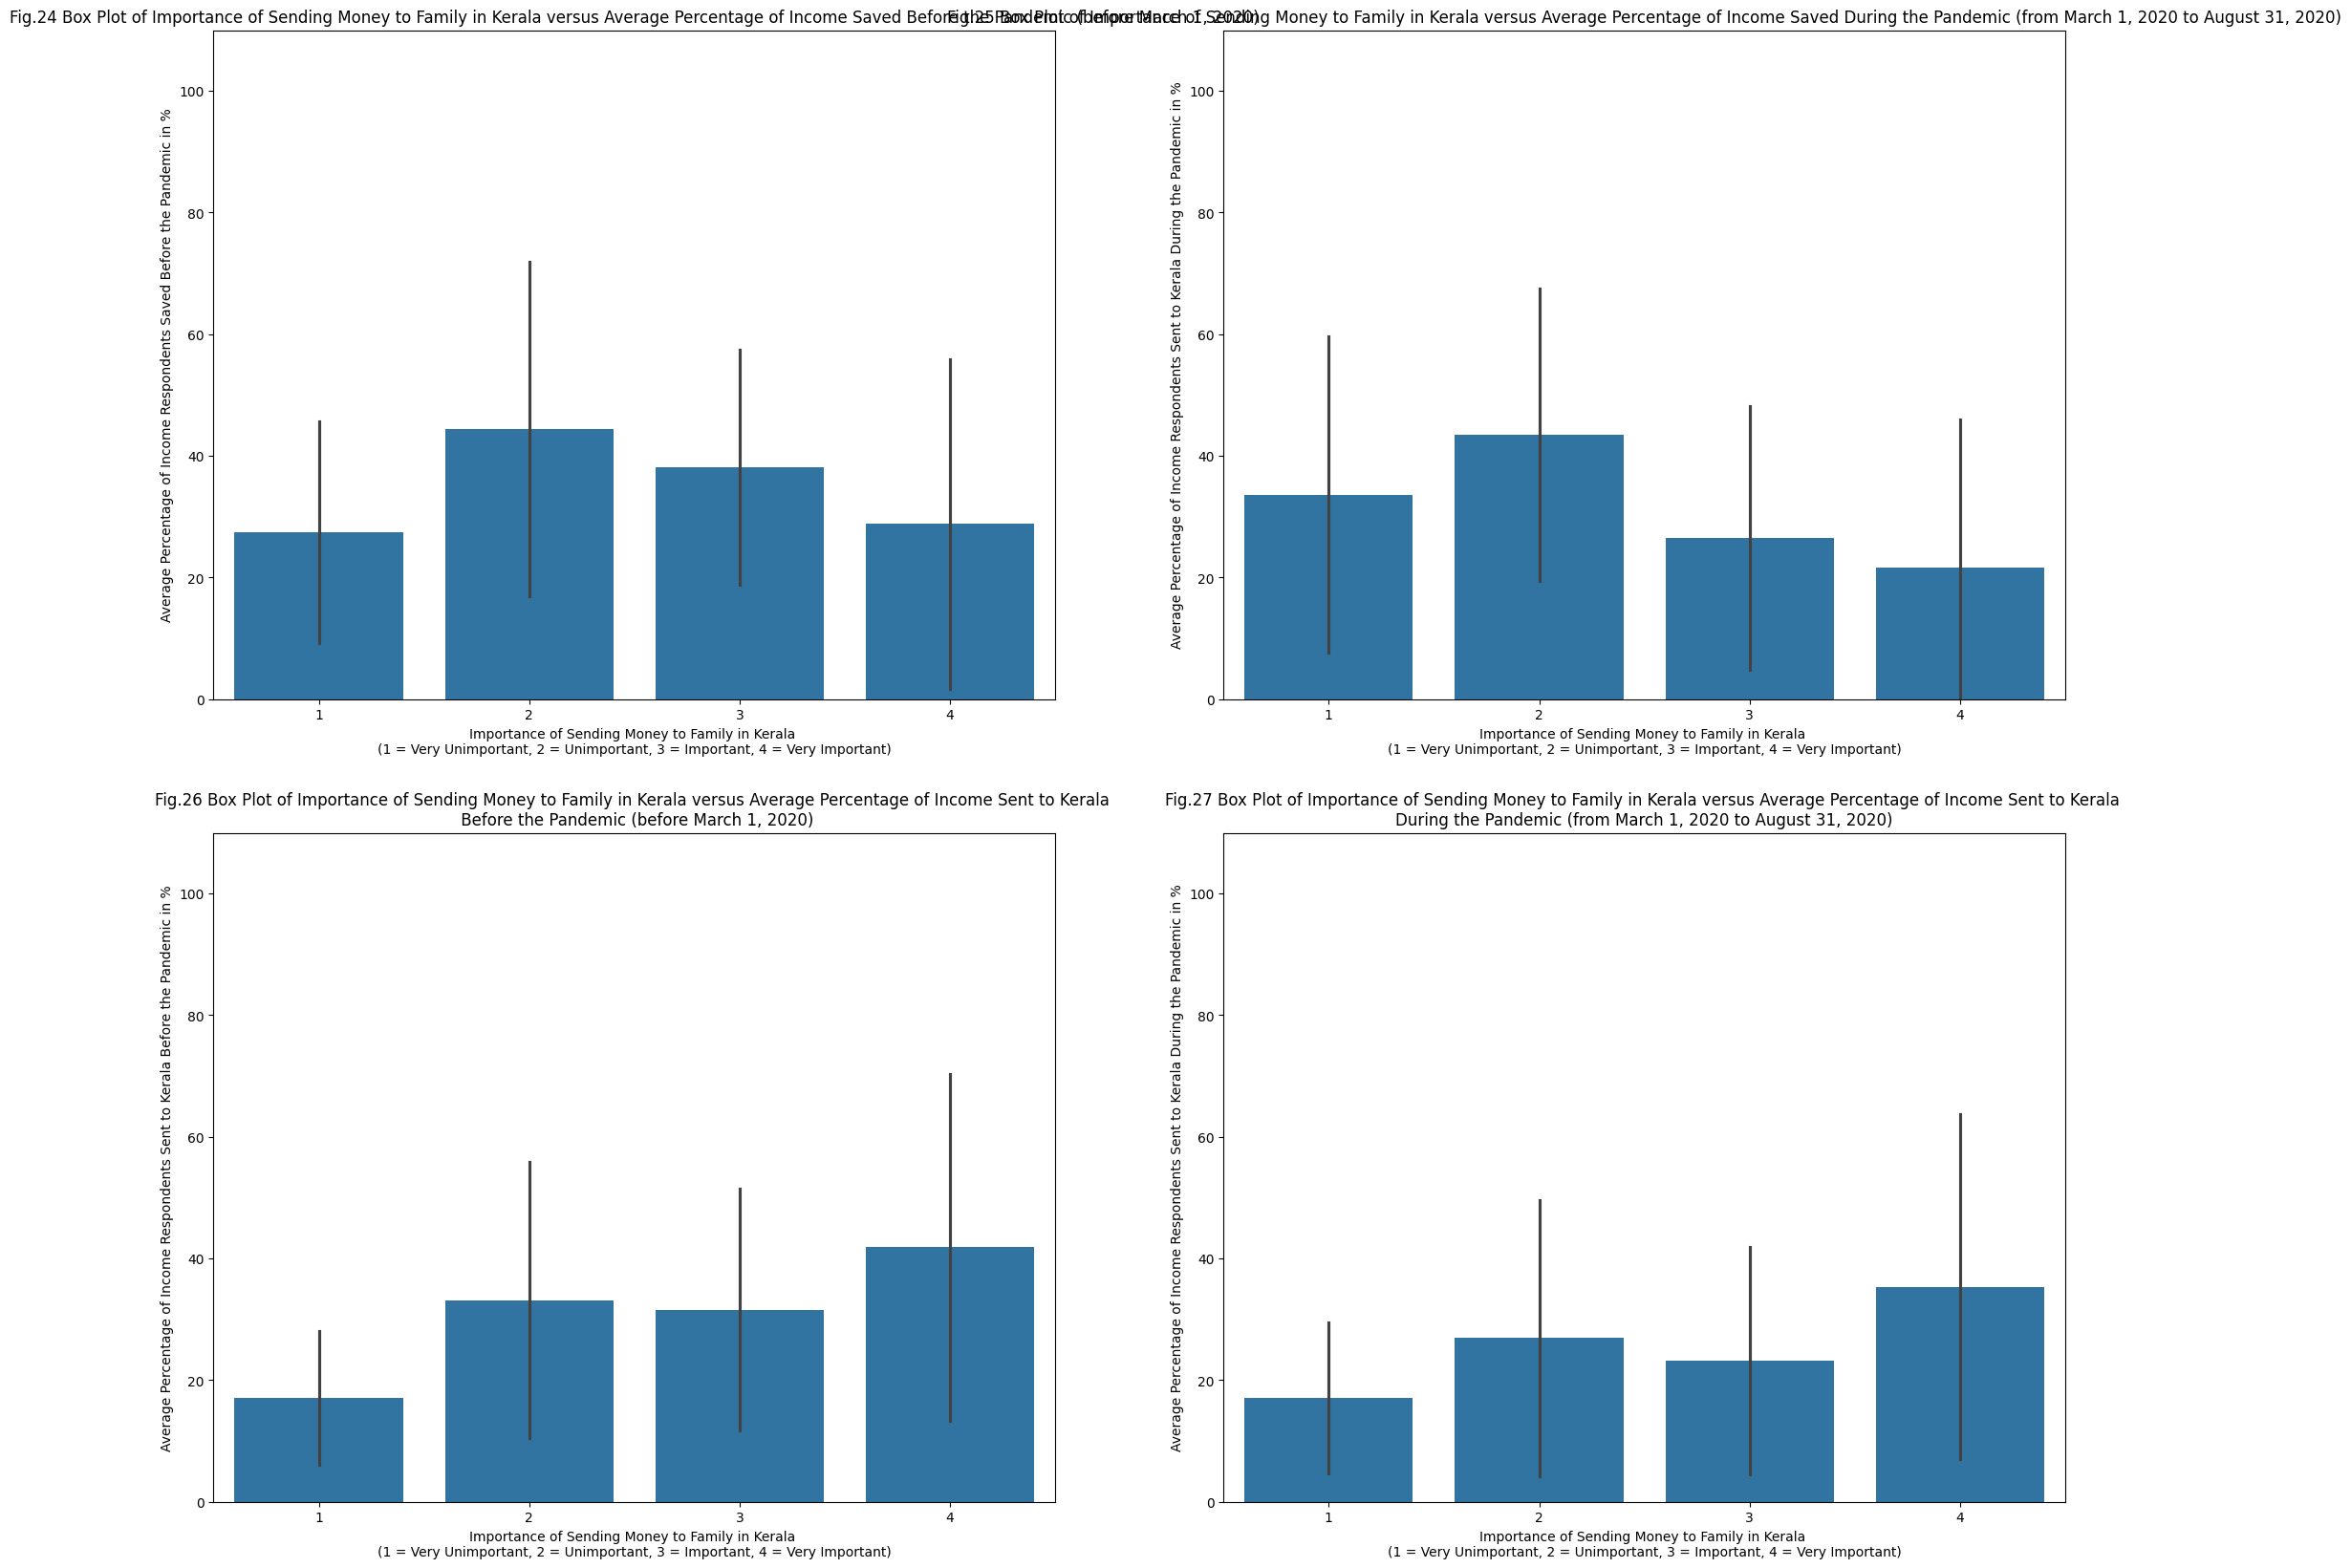

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

sns.barplot(x='Importance', y='Percentage Saved Before', data=before_df, estimator='mean', errorbar='sd', ax=axes[0, 0])
axes[0, 0].set_title("Fig.24 Box Plot of Importance of Sending Money to Family in Kerala versus Average Percentage of Income Saved Before the Pandemic (before March 1, 2020)")
axes[0, 0].set_xlabel("Importance of Sending Money to Family in Kerala \n(1 = Very Unimportant, 2 = Unimportant, 3 = Important, 4 = Very Important)")
axes[0, 0].set_ylabel("Average Percentage of Income Respondents Saved Before the Pandemic in %")
axes[0, 0].set_ylim(0, 110)

sns.barplot(x='Importance', y='Percentage Saved During', data=during_df, estimator='mean', errorbar='sd', ax=axes[0, 1])
axes[0, 1].set_title("Fig.25 Box Plot of Importance of Sending Money to Family in Kerala versus Average Percentage of Income Saved During the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[0, 1].set_xlabel("Importance of Sending Money to Family in Kerala \n(1 = Very Unimportant, 2 = Unimportant, 3 = Important, 4 = Very Important)")
axes[0, 1].set_ylabel("Average Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[0, 1].set_ylim(0, 110)

sns.barplot(x='Importance', y='Percentage Sent to Kerala Before', data=before_df, estimator='mean', errorbar='sd', ax=axes[1, 0])
axes[1, 0].set_title("Fig.26 Box Plot of Importance of Sending Money to Family in Kerala versus Average Percentage of Income Sent to Kerala \n Before the Pandemic (before March 1, 2020)")
axes[1, 0].set_xlabel("Importance of Sending Money to Family in Kerala \n(1 = Very Unimportant, 2 = Unimportant, 3 = Important, 4 = Very Important)")
axes[1, 0].set_ylabel("Average Percentage of Income Respondents Sent to Kerala Before the Pandemic in %")
axes[1, 0].set_ylim(0, 110)

sns.barplot(x='Importance', y='Percentage Sent to Kerala During', data=during_df, estimator='mean', errorbar='sd', ax=axes[1, 1])
axes[1, 1].set_title("Fig.27 Box Plot of Importance of Sending Money to Family in Kerala versus Average Percentage of Income Sent to Kerala \nDuring the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[1, 1].set_xlabel("Importance of Sending Money to Family in Kerala \n(1 = Very Unimportant, 2 = Unimportant, 3 = Important, 4 = Very Important)")
axes[1, 1].set_ylabel("Average Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[1, 1].set_ylim(0, 110)
plt.show()

Our results with Fig.24 and Fig.25 also support the idea that as importance grade increases, percentage of income saved decreases.

Similarly, our results with Fig.25 and Fig.26 also support the idea that as importance grade increases, percentage of income saved decreases.

In particular, these results show that the pandemic shifted down the average percenatge of income saved and sent to Kerala. However, what is interesting the shape of Fig.24 and Fig.25 are practically identical– and similarly the shape of Fig.26 and Fig.27 are very similar.

This indiccated that although the pandemic decreased the percantage of income saved/sent to Kerala, the behvior of the populace remained the same.

However, the large error bars make us question our results– do these really tell us something? So, let us see if these results are stastically relevant using an ANOVA test.

In [57]:
import scipy.stats as stats
import pandas as pd

# Example data: categories of income groups and their corresponding savings

# Perform ANOVA
_, p_value_1 = stats.f_oneway(
    before_df[before_df['Importance'] == 1]['Percentage Saved Before'],
    before_df[before_df['Importance'] == 2]['Percentage Saved Before'],
    before_df[before_df['Importance'] == 3]['Percentage Saved Before'],
    before_df[before_df['Importance'] == 4]['Percentage Saved Before'],

)

_, p_value_2 = stats.f_oneway(
    during_df[during_df['Importance'] == 1]['Percentage Saved During'],
    during_df[during_df['Importance'] == 2]['Percentage Saved During'],
    during_df[during_df['Importance'] == 3]['Percentage Saved During'],
    during_df[during_df['Importance'] == 4]['Percentage Saved During']
)

_, p_value_3 = stats.f_oneway(
    before_df[before_df['Importance'] == 1]['Percentage Sent to Kerala Before'],
    before_df[before_df['Importance'] == 2]['Percentage Sent to Kerala Before'],
    before_df[before_df['Importance'] == 3]['Percentage Sent to Kerala Before'],
    before_df[before_df['Importance'] == 4]['Percentage Sent to Kerala Before']
)

_, p_value_4 = stats.f_oneway(
    during_df[during_df['Importance'] == 1]['Percentage Sent to Kerala During'],
    during_df[during_df['Importance'] == 2]['Percentage Sent to Kerala During'],
    during_df[during_df['Importance'] == 3]['Percentage Sent to Kerala During'],
    during_df[during_df['Importance'] == 4]['Percentage Sent to Kerala During']
)

df = pd.DataFrame({
    'Relationship': ['Importance of Sending Money to Family in Kerala vs Percentage of Income Saved Before the Pandemic',
                     'Importance of Sending Money to Family in Kerala vs Percentage of Income Saved During the Pandemic',
                     'Importance of Sending Money to Family in Kerala vs Percentage of Income Sent to Kerala Before the Pandemic',
                     'Importance of Sending Money to Family in Kerala vs Percentage of Income Sent to Kerala During the Pandemic'],
    'p-value': [p_value_1, p_value_2, p_value_3, p_value_4]
})

pd.set_option('display.max_colwidth', None)
df.head()

,Relationship,p-value
0,Importance of Sending Money to Family in Kerala vs Percentage of Income Saved Before the Pandemic,0.044513
1,Importance of Sending Money to Family in Kerala vs Percentage of Income Saved During the Pandemic,0.006520
2,Importance of Sending Money to Family in Kerala vs Percentage of Income Sent to Kerala Before the Pandemic,0.004465
3,Importance of Sending Money to Family in Kerala vs Percentage of Income Sent to Kerala During the Pandemic,0.012969


These results tell us that every relationship we analyzed so far is stastically significant. Thus, we can safely conclude the following:



1.   Even though the average percentage of income saved with respect to importance grade decreased due to the pandemic, both before and during the pandemic, as importance grade increased, the percentage of income saved decreases
2.   Even though the average percentage of income sent to Kerala with respect to importance grade decreased due to the pandemic, both before and during the pandemic, as importance grade increased, the average percentage of income sent to Kerala increases



## Independent Variable: People Supported in Kerala

One factor that can influence importance is the number of people an expatriate financially supports in Kerala. So, let's see if this can be a deciding factor in savings behavior.

First, we start off with the scatter plots for inutition.

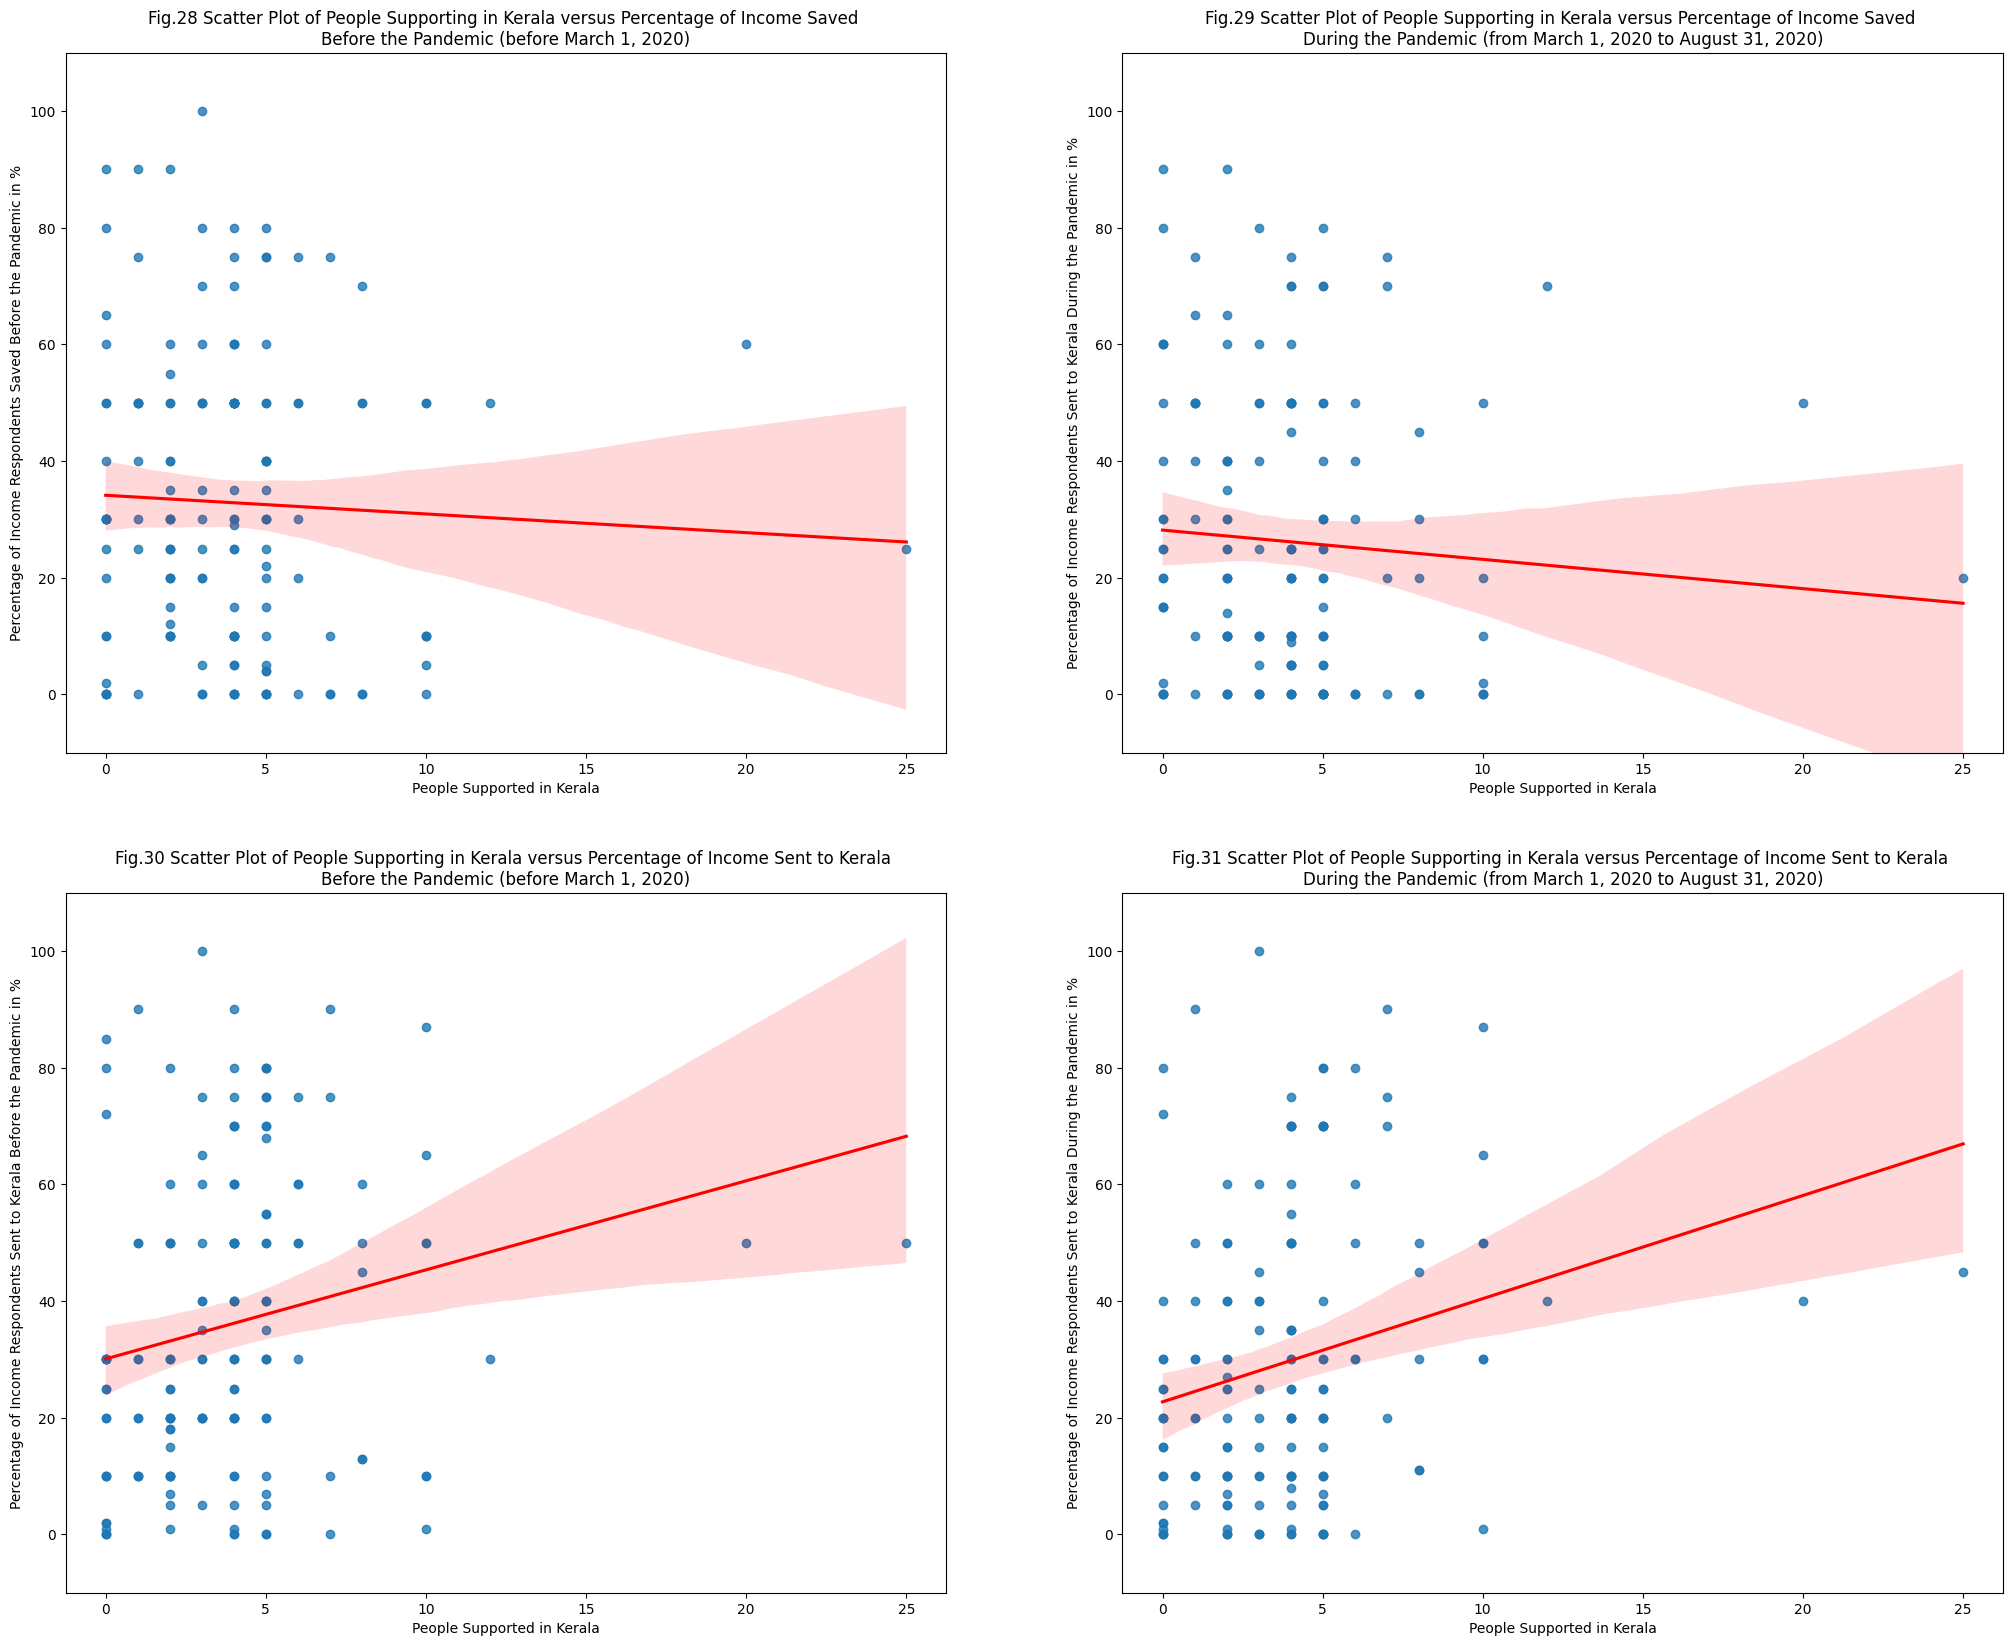

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

sns.regplot(x='People Supporting in Kerala', y='Percentage Saved Before', data=before_df, line_kws={'color': 'red'}, ax=axes[0, 0])
axes[0, 0].set_title("Fig.28 Scatter Plot of People Supporting in Kerala versus Percentage of Income Saved \nBefore the Pandemic (before March 1, 2020)")
axes[0, 0].set_xlabel("People Supported in Kerala")
axes[0, 0].set_ylabel("Percentage of Income Respondents Saved Before the Pandemic in %")
axes[0, 0].set_ylim(-10, 110)

sns.regplot(x='People Supporting in Kerala', y='Percentage Saved During', data=during_df, line_kws={'color': 'red'}, ax=axes[0, 1])
axes[0, 1].set_title("Fig.29 Scatter Plot of People Supporting in Kerala versus Percentage of Income Saved \nDuring the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[0, 1].set_xlabel("People Supported in Kerala")
axes[0, 1].set_ylabel("Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[0, 1].set_ylim(-10, 110)

sns.regplot(x='People Supporting in Kerala', y='Percentage Sent to Kerala Before', data=before_df, line_kws={'color': 'red'}, ax=axes[1, 0])
axes[1, 0].set_title("Fig.30 Scatter Plot of People Supporting in Kerala versus Percentage of Income Sent to Kerala \nBefore the Pandemic (before March 1, 2020)")
axes[1, 0].set_xlabel("People Supported in Kerala")
axes[1, 0].set_ylabel("Percentage of Income Respondents Sent to Kerala Before the Pandemic in %")
axes[1, 0].set_ylim(-10, 110)

sns.regplot(x='People Supporting in Kerala', y='Percentage Sent to Kerala During', data=during_df, line_kws={'color': 'red'}, ax=axes[1, 1])
axes[1, 1].set_title("Fig.31 Scatter Plot of People Supporting in Kerala versus Percentage of Income Sent to Kerala \nDuring the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[1, 1].set_xlabel("People Supported in Kerala")
axes[1, 1].set_ylabel("Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[1, 1].set_ylim(-10, 110)
plt.show()

Fig.28 and Fig.29 tell us

1.   That before and during the pandemic, it seems that as number of people supported in Kerala increases, the percentage of income saved decreases

2.  It seems that during the Pandemic, the trendline becomes steeper. This indicates that during the pandemic, the more people an exptraite Keralite suppors in Kerala, a lower percentage of their income they saved as opposed to before the pandemic.

Fig.30 and Fig.31 tell us

1.   That before and during the pandemic, it seems that as people supported in Kerala increases, the percentage of income sent to Kerala increases

2.  There is no noticeable change in the trendline between both figures– this could indicate that expatriates across these groups maintained a similar beahvior in sending money back to Kerala.

This gives us a good starting point– and aligns with our previous data– but let's look at this representation again using box plots.

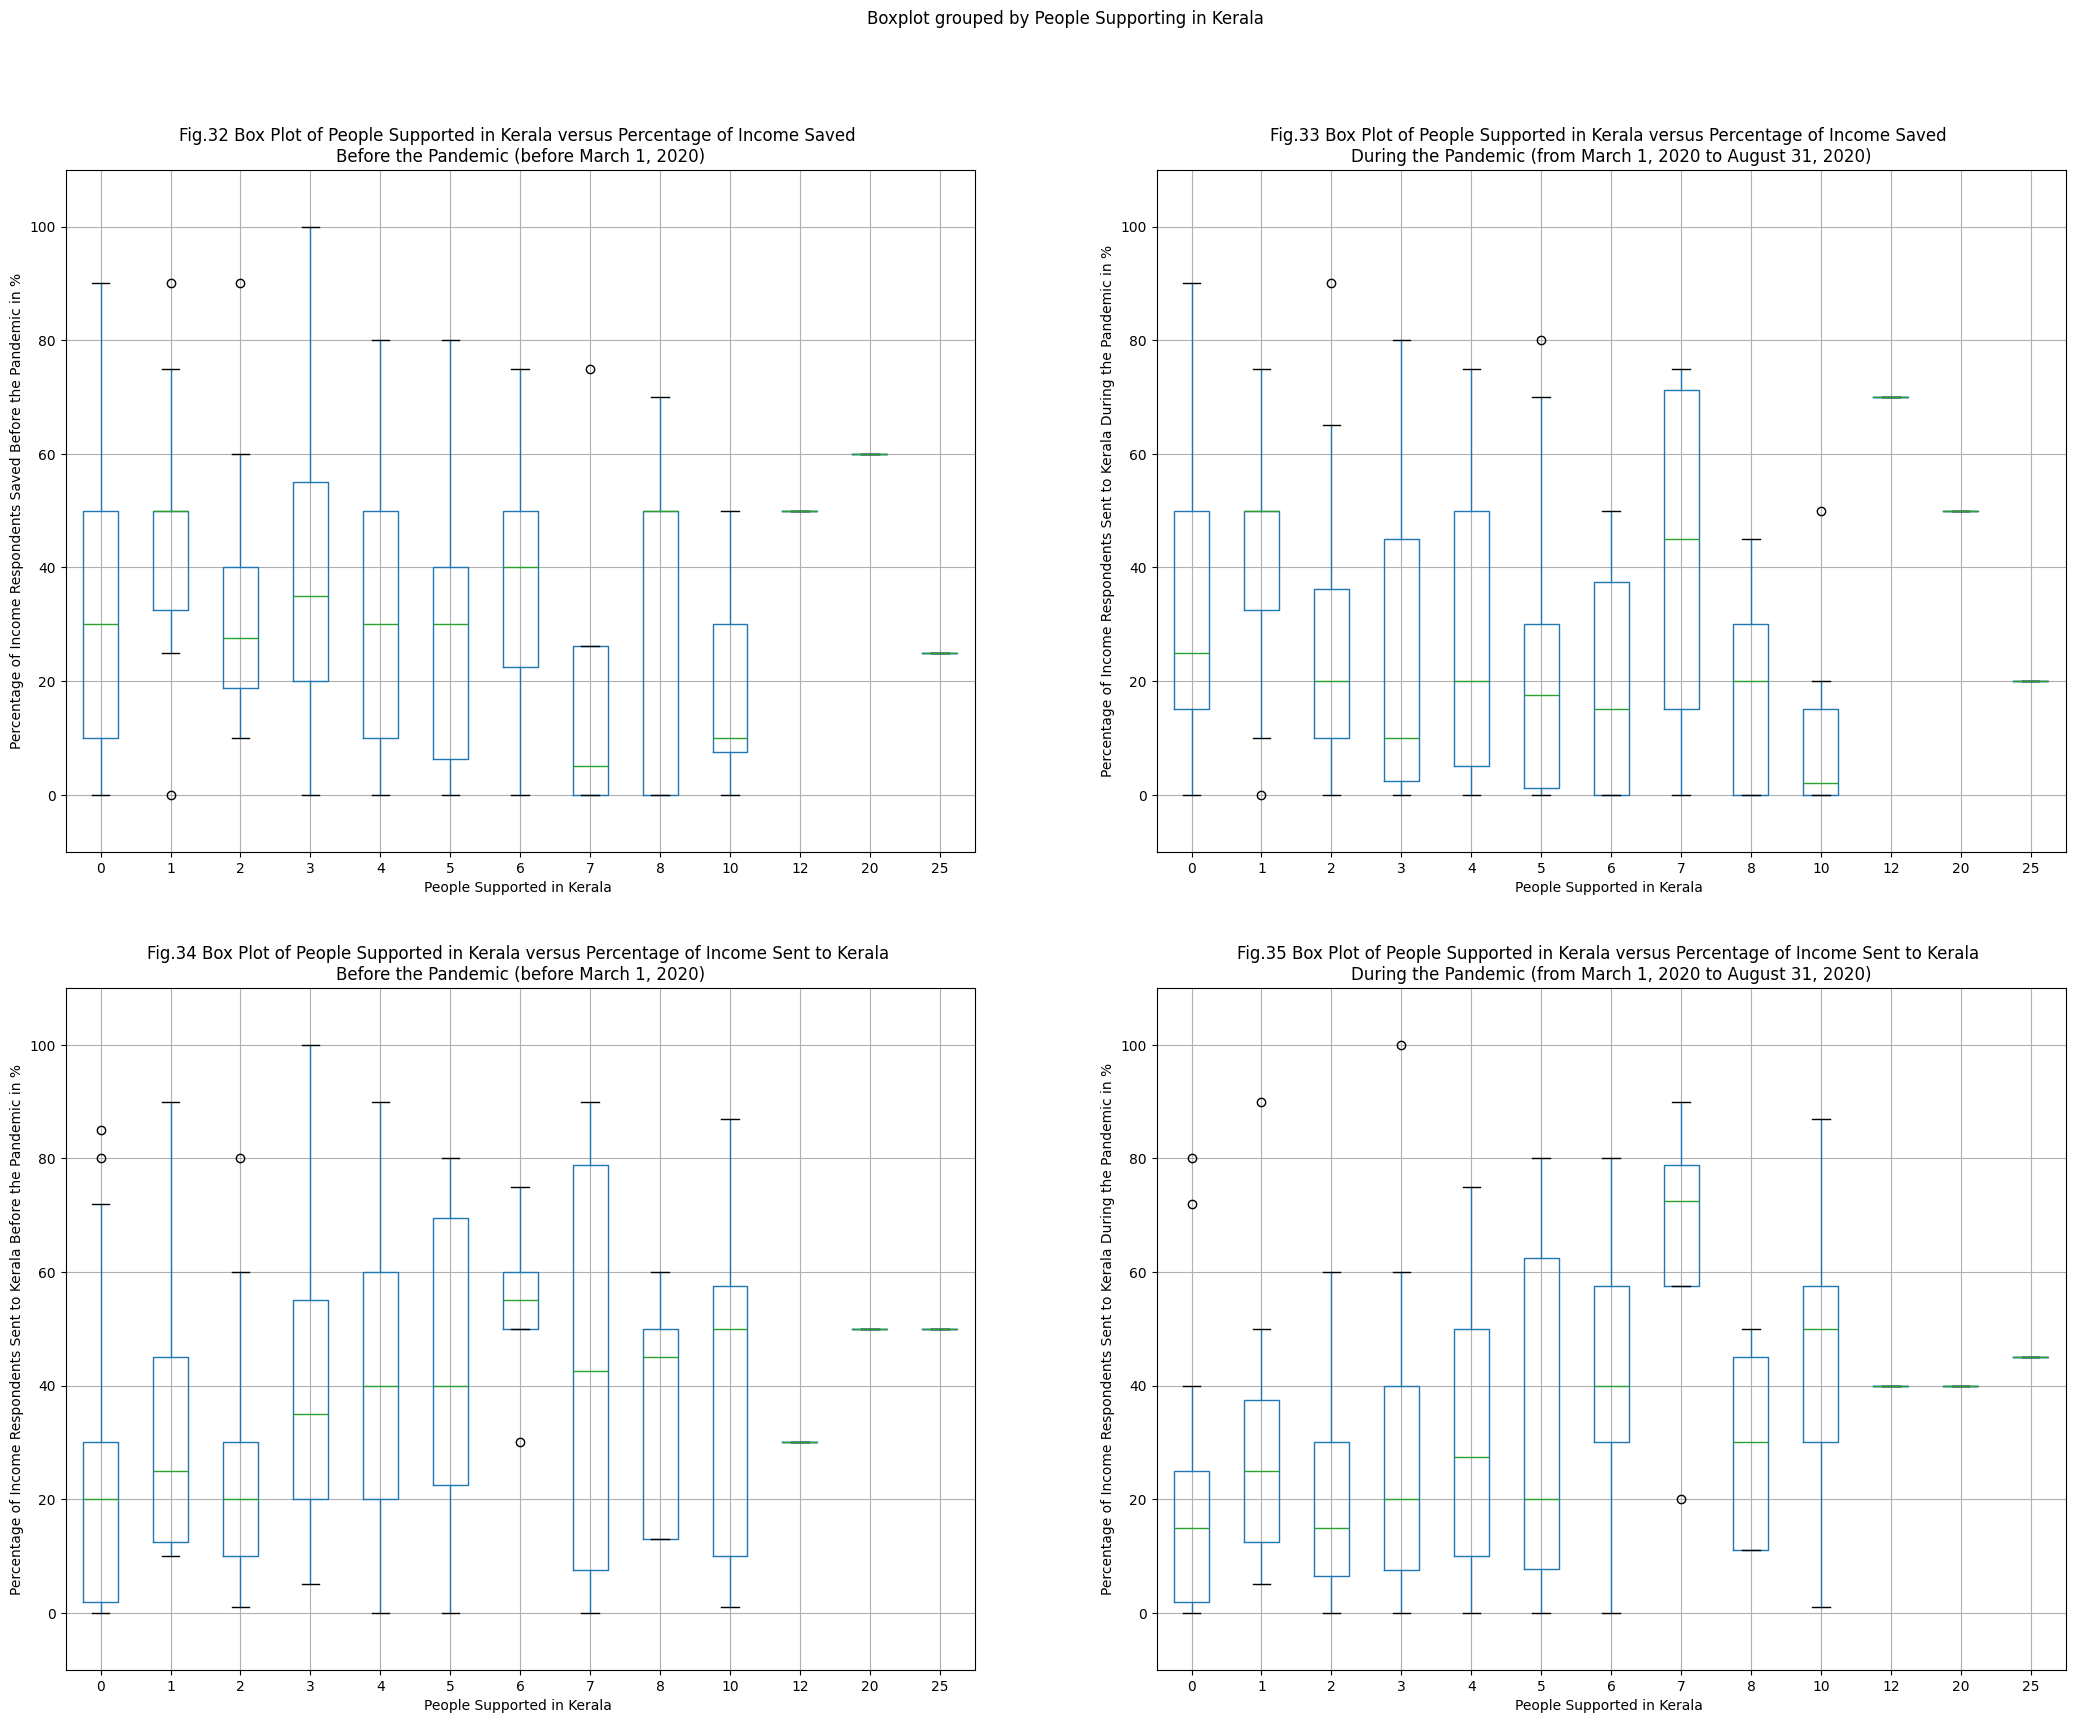

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

before_df.boxplot(by='People Supporting in Kerala', column='Percentage Saved Before', ax=axes[0, 0])
axes[0, 0].set_title("Fig.32 Box Plot of People Supported in Kerala versus Percentage of Income Saved \nBefore the Pandemic (before March 1, 2020)")
axes[0, 0].set_xlabel("People Supported in Kerala ")
axes[0, 0].set_ylabel("Percentage of Income Respondents Saved Before the Pandemic in %")
axes[0, 0].set_ylim(-10, 110)

during_df.boxplot(by='People Supporting in Kerala', column='Percentage Saved During', ax=axes[0, 1])
axes[0, 1].set_title("Fig.33 Box Plot of People Supported in Kerala versus Percentage of Income Saved \nDuring the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[0, 1].set_xlabel("People Supported in Kerala ")
axes[0, 1].set_ylabel("Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[0, 1].set_ylim(-10, 110)

before_df.boxplot(by='People Supporting in Kerala', column='Percentage Sent to Kerala Before', ax=axes[1, 0])
axes[1, 0].set_title("Fig.34 Box Plot of People Supported in Kerala versus Percentage of Income Sent to Kerala \nBefore the Pandemic (before March 1, 2020)")
axes[1, 0].set_xlabel("People Supported in Kerala ")
axes[1, 0].set_ylabel("Percentage of Income Respondents Sent to Kerala Before the Pandemic in %")
axes[1, 0].set_ylim(-10, 110)

during_df.boxplot(by='People Supporting in Kerala', column='Percentage Sent to Kerala During', ax=axes[1, 1])
axes[1, 1].set_title("Fig.35 Box Plot of People Supported in Kerala versus Percentage of Income Sent to Kerala \nDuring the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[1, 1].set_xlabel("People Supported in Kerala ")
axes[1, 1].set_ylabel("Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[1, 1].set_ylim(-10, 110)

plt.show()

In [60]:
during_df["People Supporting in Kerala"].value_counts()

,count
People Supporting in Kerala,
4,32
5,26
2,24
0,21
3,15
1,10
10,7
6,6
8,5


Using these diagrams, let us compare between Fig.32 and Fig.33:

1.   In general, we can see that the pandemic either shifts each box plot down, or it stays the same.

seems to shift each box plot down more– in particular each box for the income category drops closer to zero

2. The median percentage of income saved also seems to decreasing as the number of people supported in Kerala decreases

Let us also compare the box plots in-between Fig.34 and Fig.35:


1.  We can see here that the pandemic has also caused a general shifting down of each box plot– each box plot is closer to zero. The median values also for each result tend to decrease during the pandemic. The only notaable exception is the group of people that support seven people in Kerala. Howver, this group only had four people. So, even the change in bevhior of one person can have large impacts on the entire group. So, its not necessarily important

2.   However, before the pandemic, we notice that as the number of people supported in Kerala increase, the percentage of income sent to Kerala increases until it plateaus at aroung 50%. We can notice the same trend during the pandemic, except the data tends to plateau around 40%.

To examine this in greater detail, let us use boxplots.

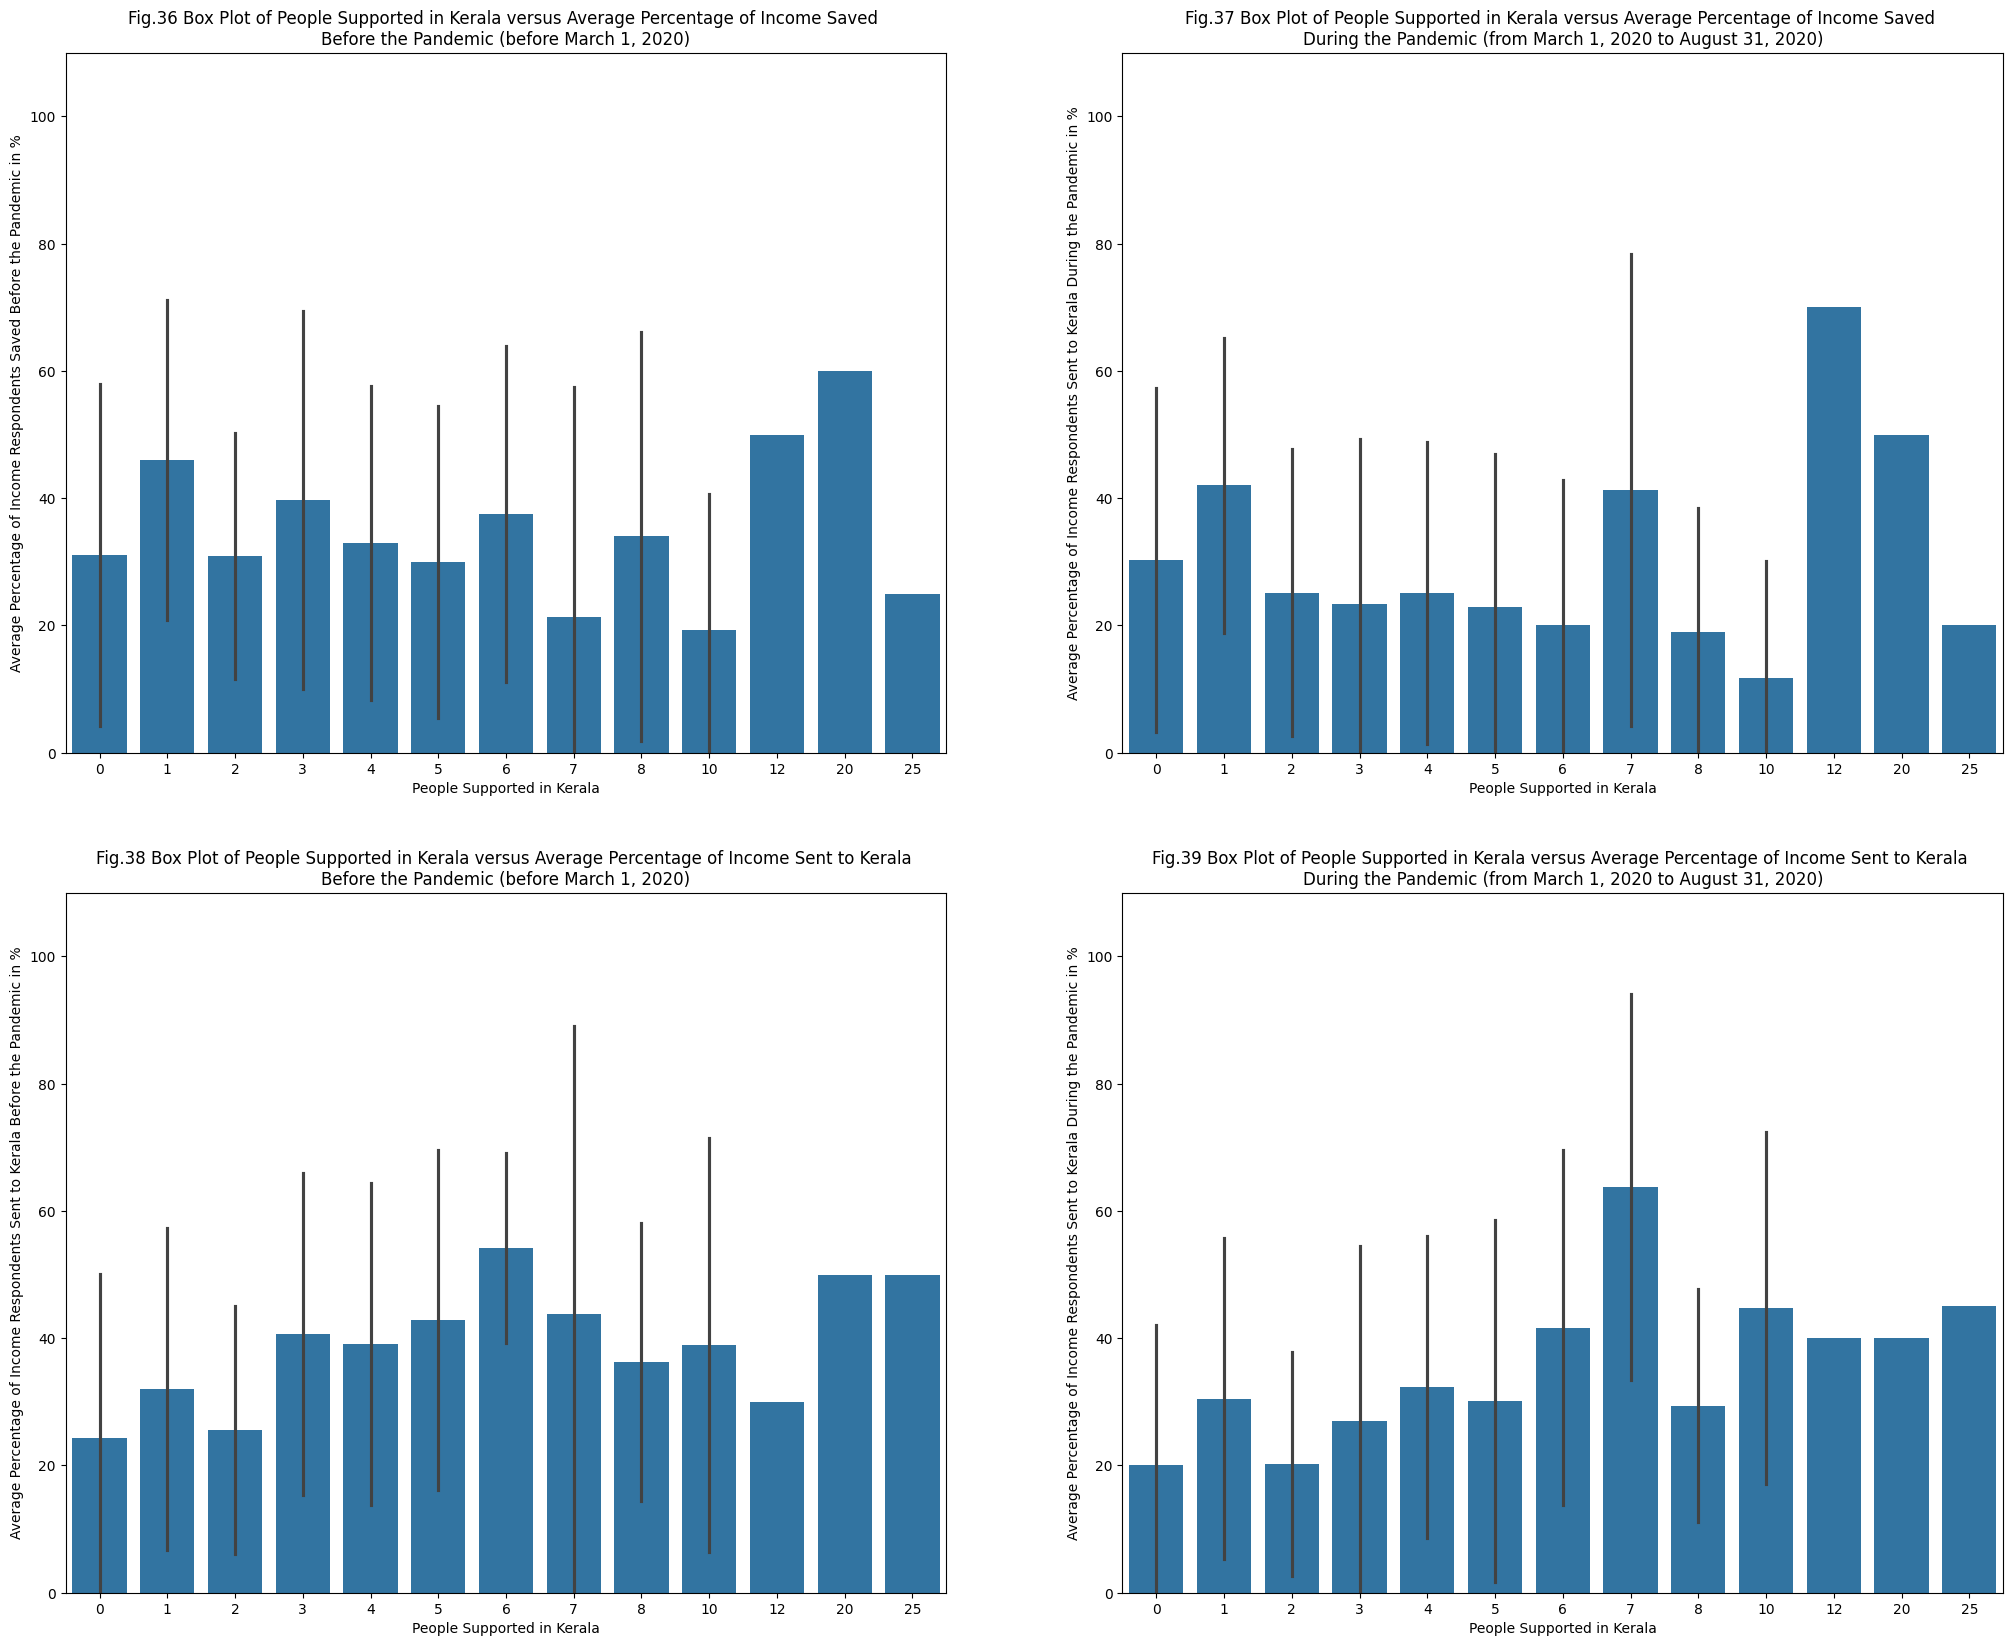

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

sns.barplot(x='People Supporting in Kerala', y='Percentage Saved Before', data=before_df, estimator='mean', errorbar='sd', ax=axes[0, 0])
axes[0, 0].set_title("Fig.36 Box Plot of People Supported in Kerala versus Average Percentage of Income Saved \nBefore the Pandemic (before March 1, 2020)")
axes[0, 0].set_xlabel("People Supported in Kerala")
axes[0, 0].set_ylabel("Average Percentage of Income Respondents Saved Before the Pandemic in %")
axes[0, 0].set_ylim(0, 110)

sns.barplot(x='People Supporting in Kerala', y='Percentage Saved During', data=during_df, estimator='mean', errorbar='sd', ax=axes[0, 1])
axes[0, 1].set_title("Fig.37 Box Plot of People Supported in Kerala versus Average Percentage of Income Saved \nDuring the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[0, 1].set_xlabel("People Supported in Kerala")
axes[0, 1].set_ylabel("Average Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[0, 1].set_ylim(0, 110)

sns.barplot(x='People Supporting in Kerala', y='Percentage Sent to Kerala Before', data=before_df, estimator='mean', errorbar='sd', ax=axes[1, 0])
axes[1, 0].set_title("Fig.38 Box Plot of People Supported in Kerala versus Average Percentage of Income Sent to Kerala \nBefore the Pandemic (before March 1, 2020)")
axes[1, 0].set_xlabel("People Supported in Kerala")
axes[1, 0].set_ylabel("Average Percentage of Income Respondents Sent to Kerala Before the Pandemic in %")
axes[1, 0].set_ylim(0, 110)

sns.barplot(x='People Supporting in Kerala', y='Percentage Sent to Kerala During', data=during_df, estimator='mean', errorbar='sd', ax=axes[1, 1])
axes[1, 1].set_title("Fig.39 Box Plot of People Supported in Kerala versus Average Percentage of Income Sent to Kerala \nDuring the Pandemic (from March 1, 2020 to August 31, 2020)")
axes[1, 1].set_xlabel("People Supported in Kerala")
axes[1, 1].set_ylabel("Average Percentage of Income Respondents Sent to Kerala During the Pandemic in %")
axes[1, 1].set_ylim(0, 110)
plt.show()

From the boxplots we can confirm two things:


1.   Before and During the Pandemic as the numer of people supported in Kerala increases, the percentage of income saved decreases
2.   Before and During the Pandemic, as the number of people supported in Kerala increase, the percentage of income sent to Kerala increases.

However, just like in the previous category, we cannot fully trust if these changes are stastically significant due to the large error bars. So, let's do an ANOVA test.



In [49]:
import scipy.stats as stats
import pandas as pd

# Example data: categories of income groups and their corresponding savings

# Perform ANOVA
_, p_value_1 = stats.f_oneway(
    before_df[before_df['People Supporting in Kerala'] == 0]['Percentage Saved Before'],
    before_df[before_df['People Supporting in Kerala'] == 1]['Percentage Saved Before'],
    before_df[before_df['People Supporting in Kerala'] == 2]['Percentage Saved Before'],
    before_df[before_df['People Supporting in Kerala'] == 3]['Percentage Saved Before'],
    before_df[before_df['People Supporting in Kerala'] == 4]['Percentage Saved Before'],
    before_df[before_df['People Supporting in Kerala'] == 5]['Percentage Saved Before'],
    before_df[before_df['People Supporting in Kerala'] == 6]['Percentage Saved Before'],
    before_df[before_df['People Supporting in Kerala'] == 7]['Percentage Saved Before'],
    before_df[before_df['People Supporting in Kerala'] == 8]['Percentage Saved Before'],
    before_df[before_df['People Supporting in Kerala'] == 10]['Percentage Saved Before'],
    before_df[before_df['People Supporting in Kerala'] == 12]['Percentage Saved Before'],
    before_df[before_df['People Supporting in Kerala'] == 20]['Percentage Saved Before'],
    before_df[before_df['People Supporting in Kerala'] == 25]['Percentage Saved Before']
)

_, p_value_2 = stats.f_oneway(
    during_df[during_df['People Supporting in Kerala'] == 0]['Percentage Saved During'],
    during_df[during_df['People Supporting in Kerala'] == 1]['Percentage Saved During'],
    during_df[during_df['People Supporting in Kerala'] == 2]['Percentage Saved During'],
    during_df[during_df['People Supporting in Kerala'] == 3]['Percentage Saved During'],
    during_df[during_df['People Supporting in Kerala'] == 4]['Percentage Saved During'],
    during_df[during_df['People Supporting in Kerala'] == 5]['Percentage Saved During'],
    during_df[during_df['People Supporting in Kerala'] == 6]['Percentage Saved During'],
    during_df[during_df['People Supporting in Kerala'] == 7]['Percentage Saved During'],
    during_df[during_df['People Supporting in Kerala'] == 8]['Percentage Saved During'],
    during_df[during_df['People Supporting in Kerala'] == 10]['Percentage Saved During'],
    during_df[during_df['People Supporting in Kerala'] == 12]['Percentage Saved During'],
    during_df[during_df['People Supporting in Kerala'] == 20]['Percentage Saved During'],
    during_df[during_df['People Supporting in Kerala'] == 25]['Percentage Saved During']
)
_, p_value_3 = stats.f_oneway(
    before_df[before_df['People Supporting in Kerala'] == 0]['Percentage Sent to Kerala Before'],
    before_df[before_df['People Supporting in Kerala'] == 1]['Percentage Sent to Kerala Before'],
    before_df[before_df['People Supporting in Kerala'] == 2]['Percentage Sent to Kerala Before'],
    before_df[before_df['People Supporting in Kerala'] == 3]['Percentage Sent to Kerala Before'],
    before_df[before_df['People Supporting in Kerala'] == 4]['Percentage Sent to Kerala Before'],
    before_df[before_df['People Supporting in Kerala'] == 5]['Percentage Sent to Kerala Before'],
    before_df[before_df['People Supporting in Kerala'] == 6]['Percentage Sent to Kerala Before'],
    before_df[before_df['People Supporting in Kerala'] == 7]['Percentage Sent to Kerala Before'],
    before_df[before_df['People Supporting in Kerala'] == 8]['Percentage Sent to Kerala Before'],
    before_df[before_df['People Supporting in Kerala'] == 10]['Percentage Sent to Kerala Before'],
    before_df[before_df['People Supporting in Kerala'] == 12]['Percentage Sent to Kerala Before'],
    before_df[before_df['People Supporting in Kerala'] == 20]['Percentage Sent to Kerala Before'],
    before_df[before_df['People Supporting in Kerala'] == 25]['Percentage Sent to Kerala Before']
)

_, p_value_4 = stats.f_oneway(
    during_df[during_df['People Supporting in Kerala'] == 0]['Percentage Sent to Kerala During'],
    during_df[during_df['People Supporting in Kerala'] == 1]['Percentage Sent to Kerala During'],
    during_df[during_df['People Supporting in Kerala'] == 2]['Percentage Sent to Kerala During'],
    during_df[during_df['People Supporting in Kerala'] == 3]['Percentage Sent to Kerala During'],
    during_df[during_df['People Supporting in Kerala'] == 4]['Percentage Sent to Kerala During'],
    during_df[during_df['People Supporting in Kerala'] == 5]['Percentage Sent to Kerala During'],
    during_df[during_df['People Supporting in Kerala'] == 6]['Percentage Sent to Kerala During'],
    during_df[during_df['People Supporting in Kerala'] == 7]['Percentage Sent to Kerala During'],
    during_df[during_df['People Supporting in Kerala'] == 8]['Percentage Sent to Kerala During'],
    during_df[during_df['People Supporting in Kerala'] == 10]['Percentage Sent to Kerala During'],
    during_df[during_df['People Supporting in Kerala'] == 12]['Percentage Sent to Kerala During'],
    during_df[during_df['People Supporting in Kerala'] == 20]['Percentage Sent to Kerala During'],
    during_df[during_df['People Supporting in Kerala'] == 25]['Percentage Sent to Kerala During']
)

df = pd.DataFrame({
    'Relationship': ['People Supported in Kerala vs Percentage of Income Saved Before the Pandemic',
                     'People Supported in Kerala vs Percentage of Income Saved During the Pandemic',
                     'People Supported in Kerala vs Percentage of Income Sent to Kerala Before the Pandemic',
                     'People Supported in Kerala vs Percentage of Income Sent to Kerala During the Pandemic'],
    'p-value': [p_value_1, p_value_2, p_value_3, p_value_4]
})

pd.set_option('display.max_colwidth', None)
df.head()

,Relationship,p-value
0,People Supported in Kerala vs Percentage of Income Saved Before the Pandemic,0.686337
1,People Supported in Kerala vs Percentage of Income Saved During the Pandemic,0.270693
2,People Supported in Kerala vs Percentage of Income Sent to Kerala Before the Pandemic,0.212244
3,People Supported in Kerala vs Percentage of Income Sent to Kerala During the Pandemic,0.079083


In an interesting twist– we find that none of this data is actually stastically viable! All of them have p-value over 0.05. Thus, none of the differences between groups are stastically significant.

This is why we must use stastical tests to see if relationships are valid or not. The graphs above tell an almost convincing story– that almost immediately break upon encountering a stastical test.

## Conclusion

After these inital explorations, we can spot an interesting obvervation. It seems the average percentage of income saved or sent to Kerala have all decreased due to the pandemic.

However, even through these situations, expatriate Keralites still maintain the same savings and remittance behaviors. Particualry, we can notice that lower income respondents focused on sending more of their income to Kerala.

The pandemic may have reduced the populations economic ability to send as much of their money as before– but it seems they still mainted that same drive to send money back.

## Why you Shouldn't Trust this Data



Naturally, many of you would think that communicating data piece should tell you everything– but you should actually view it as a misleading data piece. There are several reasons for this:



1.   Wikipedia estimates that there are about 1 million Keralites in Abu Dhabi. This data set was analyzed on 150 people– it is most definitely not a representative sample. We just don't have enough information to get reliable results.

2.   We started with 205 responses, and due to inccorect responses, it got whittled down to 150. This means that the survey was hard for people to understand. I mean, no one can give exact answers on percentage saved or percentage sent to Kerala. These are all estimates, and it isn't really viable. People could have lied to make themselves feel better.


These are some reasons as to why this dataset isn't good– but it gives us just a bit more insight into the population



## Extra Reading

If you guys went through all this, and are interested enough to read more, then there some more stuff you can check out.

First of all is the Appendices, also on the GitHub. You can check it out and see what the survey looks like, and an aggregation of the results.

Based on this dataset, I wrote a paper in High School– doing a more economic analysis on this with an interesting econmic theory. It's less focused on data manipulation, and more of a qualitative analysis. It's also linked on the GitHub, so check it out!